## Search Tree -> Similar Words

In [1]:
csv_path = '/Users/mqgao/Workspace/Lecture/datasource/sqlResult_1558435.csv'

In [2]:
import pandas as pd

In [5]:
content = pd.read_csv(csv_path, encoding='gb18030')

In [6]:
content = content.fillna('')

In [8]:
news_content = content['content'].tolist()

In [10]:
import jieba

In [12]:
def cut(string): return ' '.join(jieba.cut(string))

In [13]:
cut('这是一个测试')

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/lx/xy106sq15v1c9hbk_hg9wbdh0000gn/T/jieba.cache
Loading model cost 0.948 seconds.
Prefix dict has been built succesfully.


'这是 一个 测试'

In [14]:
import re

In [15]:
def token(string):
    return re.findall(r'[\d|\w]+', string)

In [16]:
token('这是一个测试\n\n\n')

['这是一个测试']

In [17]:
news_content = [token(n) for n in news_content]

In [19]:
news_content = [' '.join(n) for n in news_content]

In [20]:
news_content = [cut(n) for n in news_content]

In [23]:
news_content[1]

'骁龙 835 作为 唯一 通过 Windows   10 桌面 平台 认证 的 ARM 处理器   高通 强调   不会 因为 只 考虑 性能 而 去 屏蔽掉 小 核心   相反   他们 正 联手 微软   找到 一种 适合 桌面 平台 的   兼顾 性能 和 功耗 的 完美 方案   报道 称   微软 已经 拿到 了 一些 新 的 源码   以便 Windows   10 更好 地 理解 big   little 架构   资料 显示   骁龙 835 作为 一款 集成 了 CPU   GPU   基带   蓝牙   Wi   Fi 的 SoC   比 传统 的 Wintel 方案 可以 节省 至少 30   的 PCB 空间   按计划   今年 Q4   华硕   惠普   联想 将 首发 骁龙 835   Win10 电脑   预计 均 是 二合一 形态 的 产品   当然   高通 骁龙 只是 个 开始   未来 也许 还 能 见到 三星 Exynos   联发科   华为 麒麟   小米 澎湃 等 进入 Windows   10 桌面 平台'

In [24]:
with open('news-sentences-cut.txt', 'w') as f:
    for n in news_content:
        f.write(n + '\n')

In [25]:
from gensim.models import Word2Vec

In [26]:
from gensim.models.word2vec import LineSentence

In [27]:
news_word2ve= Word2Vec(LineSentence('news-sentences-cut.txt'), size=35, workers=8)

In [29]:
news_word2ve.most_similar('葡萄牙', topn=20)

/Users/mqgao/anaconda3/envs/fastprint/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/Users/mqgao/anaconda3/envs/fastprint/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('意大利', 0.8631821274757385),
 ('乌拉圭', 0.825214684009552),
 ('捷克', 0.8140042424201965),
 ('摩洛哥', 0.8100565671920776),
 ('瑞士', 0.8089662194252014),
 ('苏格兰', 0.8058252334594727),
 ('拉脱维亚', 0.7981418371200562),
 ('克罗地亚', 0.7962110638618469),
 ('瑞典', 0.7864516377449036),
 ('索', 0.7836731672286987),
 ('比什凯克', 0.781333863735199),
 ('保加利亚', 0.7779492735862732),
 ('里斯本', 0.7774659991264343),
 ('罗马', 0.7754647135734558),
 ('比利时', 0.7746708393096924),
 ('西班牙', 0.770919919013977),
 ('罗马尼亚', 0.7699488401412964),
 ('巴林', 0.7671592831611633),
 ('马德里', 0.7649440169334412),
 ('科特迪瓦', 0.7451720237731934)]

## More Date, Better Results

1. 分词的问题
2. **数据量**，数据越多，效果越好，维基百科加进来，那么同义词就要好很多。

In [33]:
news_word2ve.most_similar('捷克', topn=20)

/Users/mqgao/anaconda3/envs/fastprint/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('罗马尼亚', 0.8701722621917725),
 ('意大利', 0.8535223603248596),
 ('奥地利', 0.8450300693511963),
 ('比利时', 0.8280889987945557),
 ('丹麦', 0.8252635598182678),
 ('拉脱维亚', 0.8166369795799255),
 ('葡萄牙', 0.8140042424201965),
 ('克罗地亚', 0.810190737247467),
 ('斯洛文尼亚', 0.8036374449729919),
 ('立陶宛', 0.7959407567977905),
 ('匈牙利', 0.7919612526893616),
 ('中国香港', 0.7896162867546082),
 ('保加利亚', 0.7780357599258423),
 ('南非', 0.7752379179000854),
 ('斯洛伐克', 0.7744364738464355),
 ('塞内加尔', 0.7716847062110901),
 ('乌克兰', 0.7709288597106934),
 ('乌拉圭', 0.7672867774963379),
 ('马耳他', 0.7633472084999084),
 ('济州', 0.7467528581619263)]

In [57]:
news_word2ve.most_similar('说', topn=30)

/Users/mqgao/anaconda3/envs/fastprint/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/Users/mqgao/anaconda3/envs/fastprint/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('表示', 0.8885246515274048),
 ('认为', 0.8449831604957581),
 ('指出', 0.8414607644081116),
 ('看来', 0.8250880241394043),
 ('坦言', 0.7979221940040588),
 ('告诉', 0.7897945046424866),
 ('称', 0.7602763772010803),
 ('介绍', 0.7593872547149658),
 ('明说', 0.7415071725845337),
 ('透露', 0.7175378203392029),
 ('中说', 0.7048949003219604),
 ('所说', 0.6860737800598145),
 ('特别强调', 0.6805698275566101),
 ('强调', 0.6750778555870056),
 ('文说', 0.6723114252090454),
 ('写信给', 0.6372601985931396),
 ('提到', 0.6264674663543701),
 ('时说', 0.6246466636657715),
 ('称赞', 0.621080219745636),
 ('写道', 0.6165008544921875),
 ('如是说', 0.6139222383499146),
 ('问', 0.609874427318573),
 ('讨薪', 0.597812294960022),
 ('说道', 0.5876069068908691),
 ('地说', 0.5860451459884644),
 ('所指', 0.5805799961090088),
 ('的话', 0.5791078805923462),
 ('武说', 0.5725425481796265),
 ('确信', 0.566008985042572),
 ('资深', 0.5647716522216797)]

In [58]:
news_word2ve.most_similar('认为', topn=30)

/Users/mqgao/anaconda3/envs/fastprint/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('指出', 0.910381019115448),
 ('表示', 0.8892438411712646),
 ('看来', 0.8528740406036377),
 ('说', 0.8449831604957581),
 ('称', 0.7895314693450928),
 ('坦言', 0.7894673943519592),
 ('普遍认为', 0.7473332285881042),
 ('强调', 0.7179281711578369),
 ('透露', 0.7137823104858398),
 ('建议', 0.6977660655975342),
 ('所说', 0.6849623918533325),
 ('事实上', 0.6570887565612793),
 ('告诉', 0.651526927947998),
 ('对此', 0.6513408422470093),
 ('特别强调', 0.651138186454773),
 ('相信', 0.6395066976547241),
 ('说明', 0.6358681321144104),
 ('观点', 0.6351830363273621),
 ('提到', 0.629462480545044),
 ('表明', 0.6289577484130859),
 ('资深', 0.6199988722801208),
 ('看法', 0.6161145567893982),
 ('中说', 0.6148256659507751),
 ('及其', 0.6124895811080933),
 ('介绍', 0.6117933988571167),
 ('呼吁', 0.6076287627220154),
 ('智囊团', 0.605117678642273),
 ('确信', 0.6049553751945496),
 ('明说', 0.6024243235588074),
 ('而言', 0.5983916521072388)]

In [38]:
news_word2ve.most_similar('建议', topn=10)

/Users/mqgao/anaconda3/envs/fastprint/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('意见建议', 0.7290327548980713),
 ('要求', 0.7280189394950867),
 ('指出', 0.7092646956443787),
 ('强调', 0.7006491422653198),
 ('认为', 0.6977660655975342),
 ('表示', 0.663802444934845),
 ('提醒', 0.6556661128997803),
 ('慎重', 0.6483229398727417),
 ('意见', 0.6467110514640808),
 ('呼吁', 0.6428859233856201)]

In [40]:
from collections import defaultdict

In [60]:
def get_related_words(initial_words, model):
    """
    @initial_words are initial words we already know
    @model is the word2vec model
    """
    
    unseen = initial_words
    
    seen = defaultdict(int)
    
    max_size = 500  # could be greater
    
    while unseen and len(seen) < max_size:
        if len(seen) % 50 == 0: 
            print('seen length : {}'.format(len(seen)))
            
        node = unseen.pop(0)
        
        new_expanding = [w for w, s in model.most_similar(node, topn=20)]
        
        unseen += new_expanding
        
        seen[node] += 1
        
        # optimal: 1. score function could be revised
        # optimal: 2. using dymanic programming to reduce computing time
    
    return seen

In [52]:
len(news_word2ve.wv.vocab)

97927

In [53]:
related_words = get_related_words(['说', '表示'], news_word2ve)

seen length : 0


/Users/mqgao/anaconda3/envs/fastprint/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
/Users/mqgao/anaconda3/envs/fastprint/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


seen length : 50
seen length : 100
seen length : 100
seen length : 150
seen length : 150
seen length : 200
seen length : 200
seen length : 200
seen length : 200
seen length : 200
seen length : 200
seen length : 200
seen length : 250
seen length : 250
seen length : 250
seen length : 250
seen length : 250
seen length : 300
seen length : 300
seen length : 350
seen length : 400
seen length : 450


In [56]:
sorted(related_words.items(), key=lambda x: x[1], reverse=True)

[('表示', 92),
 ('指出', 85),
 ('说', 80),
 ('认为', 79),
 ('坦言', 73),
 ('看来', 64),
 ('透露', 62),
 ('提到', 56),
 ('特别强调', 55),
 ('称', 54),
 ('中说', 47),
 ('介绍', 43),
 ('强调', 43),
 ('所说', 42),
 ('告诉', 41),
 ('明说', 38),
 ('文说', 31),
 ('写道', 30),
 ('中称', 30),
 ('建议', 26),
 ('说明', 26),
 ('称赞', 25),
 ('普遍认为', 23),
 ('声称', 22),
 ('呼吁', 21),
 ('写信给', 18),
 ('时说', 18),
 ('对此', 18),
 ('表明', 18),
 ('说道', 18),
 ('提及', 18),
 ('事实上', 17),
 ('知情', 16),
 ('解释', 16),
 ('问', 15),
 ('还称', 14),
 ('时称', 14),
 ('如是说', 13),
 ('证实', 13),
 ('列举', 13),
 ('引用', 13),
 ('反复强调', 13),
 ('智囊团', 12),
 ('相信', 12),
 ('直言', 12),
 ('提出', 11),
 ('而言', 11),
 ('觉得', 11),
 ('讨薪', 11),
 ('供图', 11),
 ('对瓦姆', 11),
 ('武说', 11),
 ('描述', 11),
 ('回答', 11),
 ('置评', 10),
 ('非常重视', 10),
 ('假新闻', 9),
 ('否认', 9),
 ('露面', 9),
 ('竭尽', 9),
 ('坚信', 9),
 ('重申', 9),
 ('眼中', 8),
 ('上称', 8),
 ('怼', 8),
 ('谈谈', 8),
 ('批评', 8),
 ('来说', 7),
 ('地说', 7),
 ('祁', 7),
 ('农艺师', 7),
 ('一峰', 7),
 ('红霞', 7),
 ('具名', 7),
 ('推测', 7),
 ('岛根县', 7),
 ('确信', 7),
 ('远远不够',

## TFIDF Key words

In [63]:
news_content[0]

'此外   自 本周   6 月 12 日   起   除 小米 手机 6 等 15 款 机型 外   其余 机型 已 暂停 更新 发布   含 开发 版   体验版 内测   稳定版 暂不受 影响   以 确保 工程师 可以 集中 全部 精力 进行 系统优化 工作   有人 猜测 这 也 是 将 精力 主要 用到 MIUI   9 的 研发 之中   MIUI   8 去年 5 月 发布   距今已有 一年 有余   也 是 时候 更新换代 了   当然   关于 MIUI   9 的 确切 信息   我们 还是 等待 官方消息'

In [64]:
def document_frequency(word): 
    return sum(1 for n in news_content if word in n)

In [68]:
document_frequency('的')

70342

In [69]:
import math

In [72]:
def idf(word):
    """Gets the inversed document frequency"""
    return math.log10(len(news_content) / document_frequency(word))

In [71]:
idf('的') < idf('小米')

True

In [74]:
def tf(word, document):
    """
    Gets the term frequemcy of a @word in a @document.
    """
    words = document.split()
    
    return sum(1 for w in words if w == word)

In [77]:
content['content'][11]

'?\r\n\u3000\u3000巨丰早评：市场将再次探底\r\n\u3000\u3000【巨丰观点】\r\n\u3000\u3000周四大盘冲高回落，2500余只个股下跌。上证50、沪深300指数顽强收红。早盘大盘低开高走，展开反弹，沪指冲破120日均线压力位；午后大盘跳水，个股普跌。盘面上，保险、电力、银行、民航机场、券商、房地产、人工智能、迪士尼、网络安全等板块涨幅居前。雄安新区、福州新区、医疗器械、丝绸之路等跌幅居前。\r\n\u3000\u3000金融股全线大涨：保险板块涨3%：新华保险、中国太保、中国人寿涨4%，中国平安涨2%；西水股份、天茂集团盘中大涨7%以上。银行板块涨2%：招商银行大涨8%，贵阳银行、兴业银行、浦发银行、兴业银行等涨幅居前。金融股是A股纳入MSCI指数的受益者，后市可以逢低关注。\r\n\u3000\u3000盘中万达电影、复星医药等白马股闪崩，导致午后市场出现大幅跳水。盘后消息，银监会于6月中旬要求各家银行排查包括万达、海航集团、复星、浙江罗森内里在内数家企业的授信及风险分析，排查对象多是近年来海外投资比较凶猛、在银行业敞口较大的民营企业集团。\r\n\u3000\u3000巨丰投顾认为自5月以来，大盘已经走出了3重底的走势，并开启中级反弹行情。沪指在上证50及白马股推动下率先反弹，但遭遇60日、120日均线强压力而出现调整。MSCI纳入A股后，沪深300指数创17个月新高，但2500余股下跌，市场分化明显。随着6月末市场流动性紧张的可能出现，市场将再次出现探底。建议投资者重点关注半年报大幅预增的错杀股和具备估值优势的大蓝筹。\r\n\u3000\u3000天信投资：尾盘跳水原因揭秘 伏击的品种曝光\r\n\u3000\u3000周四市场点评：\r\n\u3000\u3000沪深两市早盘纷纷低开，但是开盘之后权重板块崛起，其中保险和银行表现尤其明显，低矮动股指快速拉升，并顺势突破了60日均线和半年线的束缚；在主板拉升的过程中，市场的分化格局也较明显，题材板块和创业板表现相对较弱。不过虽然市场在早盘的上攻，但是成交量萎缩明教明显，所以这种上涨比较虚。果不其然，午后个股再度纷纷杀跌，同时股指也是顺势回落，沪市的半年线得而复失，形成长长的上影线；而创业板股指在回落的过程中失守5日均线的支撑。整体上周四市场全天保持宽幅震荡走势，尤其是沪

In [78]:
tf('银行', news_content[11])

6

In [79]:
tf('创业板', news_content[11])

6

In [81]:
idf('创业板')

2.506757120518876

In [83]:
idf('银行')

1.4550169427748936

In [82]:
idf('短期')

1.9923664854640575

In [80]:
tf('短期', news_content[11])

3

In [97]:
def get_keywords_of_a_ducment(document):
    words = set(document.split())
    
    tfidf = [
        (w, tf(w, document) * idf(w)) for w in words
    ]
    
    tfidf = sorted(tfidf, key=lambda x: x[1], reverse=True)
    
    return tfidf

In [90]:
news_content[0]

'此外   自 本周   6 月 12 日   起   除 小米 手机 6 等 15 款 机型 外   其余 机型 已 暂停 更新 发布   含 开发 版   体验版 内测   稳定版 暂不受 影响   以 确保 工程师 可以 集中 全部 精力 进行 系统优化 工作   有人 猜测 这 也 是 将 精力 主要 用到 MIUI   9 的 研发 之中   MIUI   8 去年 5 月 发布   距今已有 一年 有余   也 是 时候 更新换代 了   当然   关于 MIUI   9 的 确切 信息   我们 还是 等待 官方消息'

In [91]:
news_content[11]

'巨丰 早评   市场 将 再次 探底   巨丰 观点   周四 大盘 冲高 回落   2500 余 只 个股 下跌   上证 50   沪 深 300 指数 顽强 收红   早盘 大盘 低开 高 走   展开 反弹   沪 指 冲破 120 日 均线 压力 位   午后 大盘 跳水   个股 普跌   盘面 上   保险   电力   银行   民航机场   券商   房地产   人工智能   迪士尼   网络安全 等 板块 涨幅 居前   雄安 新区   福州 新区   医疗器械   丝绸之路 等 跌幅 居前   金融股 全线 大涨   保险 板块 涨 3   新华 保险   中国 太保   中国 人寿 涨 4   中国 平安 涨 2   西水股份   天茂 集团 盘中 大涨 7   以上   银行 板块 涨 2   招商银行 大涨 8   贵阳 银行   兴业银行   浦发银行   兴业银行 等 涨幅 居前   金融股 是 A股 纳入 MSCI 指数 的 受益者   后市 可以 逢 低 关注   盘中 万达 电影   复星 医药 等 白马股 闪崩   导致 午后 市场 出现 大幅 跳水   盘后 消息   银监会 于 6 月 中旬 要求 各家 银行 排查 包括 万达   海航 集团   复星   浙江 罗森 内里 在内 数家 企业 的 授信 及 风险 分析   排查 对象 多 是 近年来 海外投资 比较 凶猛   在 银行业 敞口 较大 的 民营企业 集团   巨丰 投顾 认为 自 5 月 以来   大盘 已经 走出 了 3 重底 的 走势   并 开启 中级 反弹 行情   沪 指 在 上证 50 及 白马股 推动 下 率先 反弹   但 遭遇 60 日   120 日 均线 强 压力 而 出现 调整   MSCI 纳入 A股 后   沪 深 300 指数 创 17 个 月 新高   但 2500 余股 下跌   市场 分化 明显   随着 6 月末 市场 流动性 紧张 的 可能 出现   市场 将 再次出现 探底   建议 投资者 重点 关注 半年报 大幅 预增 的 错 杀 股 和 具备 估值 优势 的 大 蓝筹   天信 投资   尾盘 跳水 原因 揭秘   伏击 的 品种 曝光   周四 市场 点评   沪 深 两市 早盘 纷纷 低开   但是 开盘 

In [103]:
%prun get_keywords_of_a_ducment(news_content[0])

In [111]:
machine_new_keywords = get_keywords_of_a_ducment(news_content[101])

In [105]:
news_content[101]

'中国 经济网 6 月 23 日讯   记者 刘瑾   日前   中国 机械 工业 百强 企业   汽车 三十 强 企业名单 出炉   在 由 中国 机械 工业 联合会   中国汽车工业协会 主办 的   中国 机械 工业 百强 企业   汽车 工业 三十 强 企业 信息 发布会   上   中国 机械 工业 联合会 会长 王瑞祥 指出   入围 企业 总体 呈现 了 持续增长 态势   2016 年 总 规模   平均 规模 均 创新 高   我国 机械 工业 总体 上 呈现 稳中 向 好 的 发展 态势   主要 经济指标 出现 恢复性 增长   同时   王瑞祥 也 表示   机械 工业 长期 积累 的 结构性 矛盾 还 没有 根本性 改变   新 的 发展 业态   发展 模式 远 未 形成   保持 平稳 健康 发展 的 基础 还 不 牢固   产业 升级   新旧 动能 转换   实现 由大 变强 任重道远   相关 数据 显示   2016 年 机械 百强 入围 企业 规模 是 15   4 亿元   比 上年 略 高   总 规模 达到 16992 亿元   平均 规模 169   92 亿元   两项 均 创新 高   相比 前 两年 的 前十强 排名   名单 基本 没有 什么 变化   只是 工程 机械行业 的 徐工   三一 和 中联重科 由于 之前 市场 环境 等 原因   整体 排位 后移 了 一 两位   但 仍 全部 在 十强 之 列   但 考虑 到 工程 机械行业 最近 以来 的 强烈 增长 态势   明年 该 行业 整体 恢复性 可能 较大   中机联 执行 副会长 陈斌 表示   机械 百强 的 年 换位 率 2005 年 曾 高达 32   此后 逐年 下降   2012 年降 至 6   不过 近几年 又 在 上升   2016 年 升至 22   说明 市场 动荡   不 确定 因素 增加   根据 中机联 公布 的 数据   2017 年 1 至 5 月 机械 增加值 增速 好于 去年 但 呈现 逐月 回落 的 态势   比如 1 至 5 月 增速 为 10   7   比 1 至 4 月 回落 0   2 点   此外 利润总额 也 出现 了 同样 的 走势   专家 分析   这是 由于 钢铁 等 原材料 价格 近

In [106]:
get_keywords_of_a_ducment(news_content[101])

[('机械', 19.73268423154147),
 ('工业', 13.726799287798574),
 ('百强', 12.218936930008129),
 ('机械行业', 11.732905915902746),
 ('王瑞祥', 9.904722647584947),
 ('中机联', 9.904722647584947),
 ('增速', 8.057368905265053),
 ('态势', 7.971371787277902),
 ('恢复性', 6.867694767829172),
 ('规模', 6.861746056315247),
 ('回落', 6.643121992377128),
 ('增长', 6.604587773896507),
 ('企业', 6.260042817487905),
 ('陈斌', 5.9311791790524575),
 ('呈现', 5.279381611367784),
 ('原材料', 5.215938100214726),
 ('16992', 4.9523613237924735),
 ('但远', 4.9523613237924735),
 ('刘瑾', 4.651331328128492),
 ('三十', 4.6438668975349),
 ('入围', 4.629743188559925),
 ('钢铁', 4.588699854270723),
 ('回升', 4.553165964236777),
 ('联合会', 4.4415451172114695),
 ('行业', 4.256149034981132),
 ('后移', 4.253391319456455),
 ('前十强', 4.253391319456455),
 ('发展', 4.24347205022841),
 ('亿元', 4.194707226838383),
 ('更新改造', 4.17421007340883),
 ('机械类', 4.17421007340883),
 ('相当规模', 4.17421007340883),
 ('年降', 4.107263283778217),
 ('徐工', 3.9981188143531488),
 ('工程', 3.9916862993694178),
 

## Wordcloud

In [107]:
import wordcloud

In [422]:
wc = wordcloud.WordCloud('/Users/mqgao/Downloads/SourceHanSerifSC-Regular.otf')
# we could download the font from https://github.com/Computing-Intelligence/datasource

In [125]:
news_content[4]

'原 标题   44 岁 女子 跑 深圳 约会 网友 被 拒   暴雨 中 裸身 奔走   深圳 交警 微博称   昨日 清晨 交警 发现 有 一 女子 赤裸 上身   行走 在 南坪 快速 上   期间 还 起 了 轻生 年头   一辅警 发现 后 赶紧 为 其 披上 黄衣   并 一路 劝说 她   那么 事发 时   到底 都 发生 了 些 什么 呢   南 都 记者 带 您 一起 还原 现场   南 都 记者 在 龙岗 大队 坂田 中队 见到 了 辅警 刘青   发现 女生 的 辅警   一位 外表 高大 帅气   说话 略带 些 腼腆 的 90 后 青年   刘青 介绍   6 月 16 日 早上 7 时 36 分   他 正在 环城 南路 附近 值勤   接到 中队 关于 一位 女子 裸身 进入 机动车 可能 有 危险 的 警情   随后 骑着 小 铁骑 开始 沿路 寻找   大概 花 了 十多分钟 在 南坪 大道 坂田 出口 往 龙岗 方向 的 逆行 辅道 上 发现 该 女子   女子 身上 一丝不挂 地逆 车流 而行   时 走时 停   时 坐 时 躺   险象环生   刘青停 好 小 铁骑   和 另外 一名 巡防 员 追 了 上去   发现 女子 的 情绪 很 低落   话 不 多   刘青 尝试 和 女子 交流   劝说 女子 离开   可 女子 并 不 愿意 接受   继续 缓慢 地往 南坪 快速路 的 主干道 上 走 去   此时 路边 上 已经 聚集 了 很 市民 围观   为了 不 刺激 女子 的 情绪   刘青 和 巡防 员 一边 盯 着 女子 一边 驱赶 着 围观 的 群众   现场 还原   从 警方 提供 的 一份 视频 了解 到   16 日 早上 7 时 25 分   女子 出现 在 坂雪岗 大道 与 环城 南路 的 监控 视频 中   此时 女子 还 穿着 白色 的 内裤   正 沿着 坂雪岗 大道 往 南坪 快速 的 方向 缓慢 地 走 着   当时 正值 上班 高峰期   十字路口 的 车流 已经 排起 了 长队   当 女子 出现 时   路上 的 市民 纷纷 驻足 观望   不少 车辆 也 放慢 了 速度   但 女子 并 不 为 市民 观望 停下 脚步   依然 缓慢 走 着   当 女子 行进 到 十字路口 

In [109]:
import matplotlib.pyplot as plt

In [110]:
%matplotlib inline

In [114]:
help(wc.generate_from_frequencies)

Help on method generate_from_frequencies in module wordcloud.wordcloud:

generate_from_frequencies(frequencies, max_font_size=None) method of wordcloud.wordcloud.WordCloud instance
    Create a word_cloud from words and frequencies.
    
    Parameters
    ----------
    frequencies : dict from string to float
        A contains words and associated frequency.
    
    max_font_size : int
        Use this font-size instead of self.max_font_size
    
    Returns
    -------
    self



In [118]:
machine_new_keywords_dict = {w: score for w, score in machine_new_keywords}

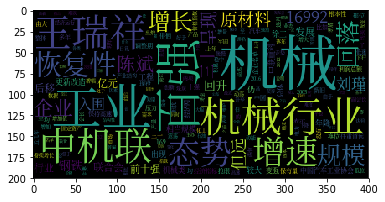

In [120]:
plt.imshow(wc.generate_from_frequencies(machine_new_keywords_dict))

In [126]:
shenzhen_social_news = get_keywords_of_a_ducment(news_content[4])

In [127]:
shenzhen_social_news

[('刘青', 67.12860103609216),
 ('女子', 49.805410612821845),
 ('南坪', 23.465811831805492),
 ('交警', 15.805787932978273),
 ('坂田', 13.953993984385477),
 ('黄衣', 13.050903997393533),
 ('巡防', 11.328810194210376),
 ('了', 11.012005636840637),
 ('轻生', 10.382998889874603),
 ('护栏', 9.32178985133465),
 ('坂雪岗', 9.302662656256985),
 ('裸身', 9.302662656256985),
 ('她', 9.285022817533253),
 ('约会', 9.267115391016052),
 ('深圳', 9.139285494790956),
 ('发现', 8.685059498920872),
 ('蜀黍', 8.214526567556433),
 ('网友', 8.126865289542744),
 ('突然', 8.047379355439626),
 ('十多分钟', 7.746360155489698),
 ('内裤', 7.746360155489698),
 ('着', 7.69376356788892),
 ('铁骑', 7.496482682273098),
 ('大概', 7.478906508099729),
 ('缓慢', 7.465405004419699),
 ('龙岗', 7.181266975549762),
 ('快速路', 7.108842630240872),
 ('大道', 6.863158044709045),
 ('环城', 6.816586558884396),
 ('辅警', 6.7921176460503725),
 ('往前走', 6.722593433531949),
 ('走', 6.658635364608071),
 ('视频', 6.65823837544899),
 ('市民', 6.50820380832565),
 ('精神病', 6.4895822953890745),
 ('主干道', 6.4

In [128]:
from PIL import Image

In [129]:
import numpy as np

In [130]:
police_mask = np.array(Image.open('/Users/mqgao/Downloads/0034.png_860.png'))

In [131]:
wordcloud_with_mask = wordcloud.WordCloud(
font_path='/Users/mqgao/Downloads/SourceHanSerifSC-Regular.otf', 
mask=police_mask
)

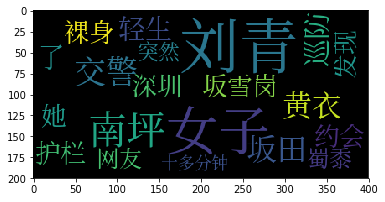

In [135]:
plt.imshow(wc.generate_from_frequencies({w:s for w, s in shenzhen_social_news[:20]}))

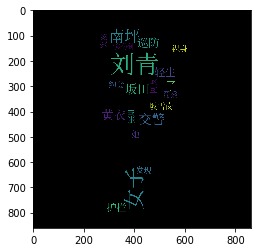

In [134]:
plt.imshow(wordcloud_with_mask.generate_from_frequencies({w:s for w, s in shenzhen_social_news[:20]}))

## TFIDF Vectorizezd

In [136]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [218]:
vectorized = TfidfVectorizer(max_features=10000)

In [138]:
news_content[:10]

['此外   自 本周   6 月 12 日   起   除 小米 手机 6 等 15 款 机型 外   其余 机型 已 暂停 更新 发布   含 开发 版   体验版 内测   稳定版 暂不受 影响   以 确保 工程师 可以 集中 全部 精力 进行 系统优化 工作   有人 猜测 这 也 是 将 精力 主要 用到 MIUI   9 的 研发 之中   MIUI   8 去年 5 月 发布   距今已有 一年 有余   也 是 时候 更新换代 了   当然   关于 MIUI   9 的 确切 信息   我们 还是 等待 官方消息',
 '骁龙 835 作为 唯一 通过 Windows   10 桌面 平台 认证 的 ARM 处理器   高通 强调   不会 因为 只 考虑 性能 而 去 屏蔽掉 小 核心   相反   他们 正 联手 微软   找到 一种 适合 桌面 平台 的   兼顾 性能 和 功耗 的 完美 方案   报道 称   微软 已经 拿到 了 一些 新 的 源码   以便 Windows   10 更好 地 理解 big   little 架构   资料 显示   骁龙 835 作为 一款 集成 了 CPU   GPU   基带   蓝牙   Wi   Fi 的 SoC   比 传统 的 Wintel 方案 可以 节省 至少 30   的 PCB 空间   按计划   今年 Q4   华硕   惠普   联想 将 首发 骁龙 835   Win10 电脑   预计 均 是 二合一 形态 的 产品   当然   高通 骁龙 只是 个 开始   未来 也许 还 能 见到 三星 Exynos   联发科   华为 麒麟   小米 澎湃 等 进入 Windows   10 桌面 平台',
 '此前 的 一加 3T 搭载 的 是 3400mAh 电池   DashCharge 快充 规格 为 5V   4A   至于 电池 缩水   可能 与 刘作 虎 所说   一加 手机 5 要 做 市面 最 轻薄 大屏 旗舰 的 设定 有关   按照 目前 掌握 的 资料   一加 手机 5 拥有 5   5 寸 1080P 三星 AMOLED 显示屏   6G   8GB   RAM   64GB   128GB   ROM   双 1600 万 摄像头   备货 量

In [266]:
sample_num = 50000
sub_samples = news_content[:sample_num]

In [267]:
X = vectorized.fit_transform(sub_samples)

In [268]:
X.shape

(50000, 10000)

<10000x50000 sparse matrix of type '<class 'numpy.float64'>'
	with 3541496 stored elements in Compressed Sparse Column format>

In [142]:
vectorized.vocabulary_

{'此外': 27288,
 '本周': 25803,
 '12': 97,
 '小米': 18002,
 '手机': 21587,
 '15': 171,
 '机型': 25938,
 '其余': 9234,
 '暂停': 25185,
 '更新': 25298,
 '发布': 12453,
 '开发': 19567,
 '体验版': 7609,
 '内测': 9359,
 '稳定版': 32707,
 '暂不受': 25182,
 '影响': 20125,
 '确保': 32141,
 '工程师': 18563,
 '可以': 12866,
 '集中': 41995,
 '全部': 8854,
 '精力': 33464,
 '进行': 39712,
 '系统优化': 33539,
 '工作': 18517,
 '有人': 25490,
 '猜测': 30199,
 '主要': 5480,
 '用到': 30792,
 'miui': 2143,
 '研发': 32063,
 '之中': 5540,
 '去年': 12200,
 '距今已有': 38706,
 '一年': 3096,
 '有余': 25495,
 '时候': 24798,
 '更新换代': 25299,
 '当然': 20053,
 '关于': 9149,
 '确切': 32144,
 '信息': 8060,
 '我们': 21296,
 '还是': 39520,
 '等待': 33210,
 '官方消息': 17242,
 '骁龙': 43153,
 '835': 1056,
 '作为': 7702,
 '唯一': 14013,
 '通过': 40181,
 'windows': 2808,
 '10': 30,
 '桌面': 26815,
 '平台': 19055,
 '认证': 37276,
 'arm': 1241,
 '处理器': 15396,
 '高通': 43421,
 '强调': 19979,
 '不会': 4067,
 '因为': 14408,
 '考虑': 34795,
 '性能': 20683,
 '屏蔽掉': 18295,
 '核心': 26699,
 '相反': 31634,
 '他们': 6862,
 '联手': 34953,
 '微软': 20352,
 '找到': 

In [222]:
np.where(X[0].toarray()) # get the positions which values are not zero

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([  37,   56,  408, 1062, 1082, 1683, 1890, 1962, 1990, 2724, 2791,
        2897, 4125, 4240, 4259, 4525, 4637, 4656, 4937, 5012, 5756, 5848,
        5874, 5925, 6008, 6047, 6293, 6931, 7371, 7392, 7645, 7710, 9084,
        9149, 9636]))

In [223]:
news_content[0]

'此外   自 本周   6 月 12 日   起   除 小米 手机 6 等 15 款 机型 外   其余 机型 已 暂停 更新 发布   含 开发 版   体验版 内测   稳定版 暂不受 影响   以 确保 工程师 可以 集中 全部 精力 进行 系统优化 工作   有人 猜测 这 也 是 将 精力 主要 用到 MIUI   9 的 研发 之中   MIUI   8 去年 5 月 发布   距今已有 一年 有余   也 是 时候 更新换代 了   当然   关于 MIUI   9 的 确切 信息   我们 还是 等待 官方消息'

In [224]:
vectorized.vocabulary_

{'此外': 6293,
 '本周': 6008,
 '12': 37,
 '小米': 4125,
 '手机': 5012,
 '15': 56,
 '机型': 6047,
 '其余': 1990,
 '暂停': 5848,
 '更新': 5874,
 '发布': 2791,
 '开发': 4525,
 '影响': 4656,
 '确保': 7392,
 '工程师': 4259,
 '可以': 2897,
 '集中': 9636,
 '全部': 1890,
 '精力': 7710,
 '进行': 9149,
 '工作': 4240,
 '有人': 5925,
 '猜测': 6931,
 '主要': 1062,
 '研发': 7371,
 '之中': 1082,
 '去年': 2724,
 '一年': 408,
 '时候': 5756,
 '当然': 4637,
 '关于': 1962,
 '信息': 1683,
 '我们': 4937,
 '还是': 9084,
 '等待': 7645,
 '骁龙': 9880,
 '作为': 1575,
 '唯一': 3131,
 '通过': 9261,
 'windows': 329,
 '10': 12,
 '平台': 4375,
 '认证': 8537,
 '处理器': 3478,
 '高通': 9954,
 '强调': 4608,
 '不会': 673,
 '因为': 3211,
 '考虑': 8023,
 '性能': 4771,
 '核心': 6187,
 '相反': 7253,
 '他们': 1387,
 '联手': 8061,
 '微软': 4713,
 '找到': 5083,
 '一种': 456,
 '适合': 9206,
 '兼顾': 2012,
 '完美': 3920,
 '方案': 5662,
 '报道': 5163,
 '已经': 4285,
 '拿到': 5219,
 '一些': 345,
 '以便': 1406,
 '更好': 5871,
 '理解': 7018,
 '架构': 6137,
 '资料': 8785,
 '显示': 5812,
 '一款': 441,
 '集成': 9643,
 'cpu': 261,
 '传统': 1498,
 '节省': 8220,
 '至少': 8168,
 '30

In [159]:
import random 

In [160]:
document_id_1, document_id_2 = random.randint(0, 1000), random.randint(0, 1000)

In [161]:
document_id_1

661

In [162]:
document_id_2

460

In [226]:
news_content[document_id_1]

'中国 经济网 北京 6 月 23 日讯   不少 人 上学时 都 被 逼 着 解过 奥赛题   但 当时 的 你 绝对 没见 过 世界 顶级 奥赛 高手 是 如何 过招 的   别 遗憾   6 月 27   29 日   史上 奖金 最高   难度 最大   级别 最 豪华 的 世界 黑客 奥赛   WCTF   世界 黑客 大师 挑战赛   即将 在 北京 拉开 战火   绝对 能 满足 你 学生 时代 对 大神 的 所有 幻想 和 好奇   由 世界 黑客 大赛 Pwn2Own 总冠军 360Vulcan   Team 主办 的 WCTF 吸引 了 来自 中国   美国   俄罗斯   法国   瑞士   波兰   乌克兰   匈牙利   日本 以及 伊朗 等 10 个 国家 的 12 支 战队   其中 8 支 战队 位列 全球 CTF 排行榜 前十强   CTF 竞赛 向来 以   脑力   体力   协作 力   的 多重 考验 著称   离 正式 开赛 不到 一周   我们 先 来 看看   WCTF 准备 得 怎么样 了   点击 图片 进入 下 一页   看点 1   全球 TOP10 战队 八强 来战   WCTF 以 邀请 制 的 形式   史无前例 地 将 CTF   TIME   最新 排行榜 TOP10 中 的 八支 战队 请 到 了 中国   打造 了 迄今 最 豪华 的 CTF 参赛 阵容   这 八支 战队 有 长期 排名 世界 前列 的 俄罗斯 LC   BC   法国 瑞士 联队 0daysober   波兰 Dragon   Sector 和 p4   乌克兰 duca 等 老牌 强队   也 有 不久前 在 美国国防部 首届 机器 版 CTF 赛事   CGC   中 声名鹊起 的 美国 Shellfish 战队   势头 正盛 的 台湾 HITCON   217 战队   还有 异军突起 的 日本 binja 黑马   看点 2   10 万美元 奖金 打造 最 值钱 冠军   WCTF 自 开办 以来   就 以 打造 奖金 最高 的 CTF 赛事 而 著称   据 360Vulcan 团队 负责人 郑文彬 介绍   2017 年 WCTF 将 以 10 万美元 的 奖金 持续 领跑 全球 CTF 赛事'

In [227]:
news_content[document_id_2]

'中新网 自贡 6 月 23 日电   刘刚   代文彬   记者 23 日 获悉   四川 自贡市 荣县 雷音 乡 一名 女子 抛 下 自己 瘫痪 的 父亲 一年 多 不 照顾   还 把 父亲 的 赔偿金 挥霍一空   近日   荣县 公安局 东佳 派出所 民警 在 巡逻 盘查 中 利用 移动 警务 终端 系统 将 涉嫌 遗弃罪 的 陈某 挡 获   子女 赡养父母 本是 件 天经地义 的 事情   是 一种 义务   也 是 一种 道德   更是 一种 法律责任   据悉   6 月 20 日 上午   荣县 公安局 东佳 派出所 民警 与 往常 一样 在 辖区 执行 巡逻 盘查 任务   10 时许   民警 在 巡逻 至 荣县 东佳镇 肖公庙 村村 道口 时   一 女子 见到 警车 后 神色 慌张   准备 绕道而行   这一 举动 立即 引起 了 民警 的 警觉   民警 随即 下车 对 其 进行 盘问   该 女子 告诉 民警 自己 忘带 身份证 且 记不住 身份证 号码   并称 赶时间 急 着 要 走   民警 马上 通过 手中 的 移动 警务 终端 系统 核实 了 该 女子 身份   陈某   女   荣县 雷音 乡 人   2016 年 因涉嫌 遗弃罪 被 公安局 上网 追逃   在 掌握 这一 信息 后   民警 不动声色 地 一边 安抚 该 女子 配合 盘问   一边 细致 地 对 该 名 女子 的 随身 包 进行 检查   最后 以 其 身份证 需要 换代 更新 采集 指纹 为 由 将 其 带回 派出所 审查   经查   嫌疑人 陈某 的 父亲   离异   于 2015 年 在外 务工 时 发生 安全事故 导致 下半身 瘫痪   生活 不能 自理   陈某 在 拿到 父亲 的 赔偿金 70 万元 后   先期 支付 了 部分 医药费   便 抛 下 父亲 不管   陈某 却 用 剩余 赔偿金 私自 用于 购车 等 生活 高 消费   并 很快 将 赔偿金 挥霍一空   陈某 父亲 无奈 向东 佳 派出所 报案   荣县 公安局 于 2016 年 3 月 立案   并 将 陈某 列为 了 上网 追逃 对象   目前   嫌疑人 陈某 因涉嫌 遗弃罪 已 被 依法 采取 刑事 强制措施'

In [228]:
vector_of_d_1 = X[document_id_1].toarray()[0]

In [229]:
vector_of_d_2 = X[document_id_2].toarray()[0]

In [208]:
random_choose = random.randint(0, 1000)

In [209]:
random_choose

556

In [230]:
news_content[random_choose]

'新华社 兰州 ６ 月 ２ ３ 日电   记者 王博   在 第 ３ ０ 个   国际禁毒日   来临 之际   甘肃省 对 全省 近 ３ 年 来 缴获 的 各类 毒品 进行 公开 焚烧 销毁   共计 １ 吨   甘肃省 政法委 书记 马世忠 介绍   近年来 受 国际 国内 毒品 问题 影响   当前 甘肃 毒情 形势 仍然 十分 严峻   禁毒 工作 仍 面临 长期性   复杂性 和 严峻性   要 继续 保持 高压 态势   对 毒品 违法犯罪   零 容忍   据介绍   甘肃 正通 多种 措施 对 毒品 违法犯罪 活动 实施 高压 严打   遏制 毒品 问题 发展 蔓延   今年以来 甘肃 共 破获 毒品 案件 １ ６ ０ ０ 多 起   缴获 各类 毒品 １ ６ ０ ０ 多公斤   抓获 犯罪 嫌疑人 １ ８ ０ ０ 余名   在 禁吸戒毒 方面   甘肃 建立 戒毒 康复 医院   收治 病残 吸毒 人员   并 通过 实施 社区 戒毒   社区 康复 以及 吸毒 人员 网格化 管理模式   帮助 吸毒 人员 戒毒   ３ 年 未 复吸 人员 接近 ３ 万人   此外   甘肃 还 通过 教育引导   推进 青少年 毒品 预防 教育   目前   甘肃省 已经 把 毒品 预防 知识 纳入 中考 内容   并且 建立 了   甘肃省 禁毒 师资 培训基地   建成 毒品 预防 教育 示范 学校 ２ ７ ０ 个   培训 禁毒 师资 力量 近 ３ ０ ０ ０ 人'

In [231]:
from scipy.spatial.distance import cosine

In [232]:
def distance(v1, v2): return cosine(v1, v2)

In [180]:
distance([1, 1], [2, 2])

0.0

In [233]:
distance(X[random_choose].toarray()[0], X[document_id_1].toarray()[0])

0.9978923023386571

In [234]:
distance(X[random_choose].toarray()[0], X[document_id_2].toarray()[0])

0.9901762179609807

In [215]:
news_content[320]

'点击 图片 进入 下 一页   庭审 现场   李小华   摄   中新网 自贡 6 月 23 日电   刘刚   李小华   叶 卫东   23 日 下午   四川 自贡市 中级 人民法院 集中 公开 宣判 了 4 起 毒品 案件   毒品 总量 约 为 15890 克   涉案 被告人 16 人   其中   判处 无期徒刑 2 人   十年 以上 有期徒刑 5 人   据悉   目前   自贡市 制造 毒品 案件 增长 较 快且 数量 大   仅 今年 上半年   就 破获 3 件 制造 毒品 数量 巨大 的 案件   自贡市 中院 新闻 发言人 在 随后 召开 的 新闻 通气会 上 披露   2016 年 6 月 到 2017 年 5 月   全市 两级 法院 共 审理 毒品 犯罪案件 213 件   涉案 被告人 250 人   同比 上升 11   和 14   其中   贩卖   运输 案件 117 件   涉案 被告人 132 人   制造 毒品 案件 18 件   涉案 被告人 31 人   非法 持有 毒品   容留 他人 吸毒 案件 78 件   涉案 被告人 89 人   点击 图片 进入 下 一页   据介绍   自贡市 毒品 主要 来源于 国外   国内 两条 线路   国外 主要 是 老挝   缅甸   国内 主要 是 广东   云南   此外   近年来 出现 的 新型 毒品 也 造成 了 极大 的 社会 危害'

In [217]:
news_content[72]

'央广网 西安 6 月 19 日 消息   记者 雷恺   陕西省 今年 将 招录 250 名 中央财政 支持 中西部 农村 订单 定向 免费 本科 医学生   其中 临床医学 200 名   中医学 50 名   培养 计划 重点 向 贫困地区   革命 老区 倾斜   据介绍   国家 免费 医学生 只 招收 农村 学生   报考者 须 同时 具备 两个 条件   一是 已 参加 2017 年 陕西省 普通高校 招生 考试 报名   二是 本人 及 父亲 或 母亲 或 法定 监护人 户籍地 须 在 陕西省 农村   本人 具有 当地 连续 3 年 以上 户籍   国家 免费 医学生 录取 后   获得 入学 通知书 前   须 与 培养 高校 和 定向 就业 所在地 的 县级 卫生 计生   人力资源 社会保障 行政部门 签署 统一 制式 的 定向培养 和 就业 协议   承诺 毕业 后 到 有关 基层 医疗卫生 机构 服务 6 年   含 3 年 全科 专业 住院医师 规范化 培训   未 按 入学 前 签署 的 协议 规定 履约 的   退还 已 减免 的 教育 培训 费用   生活 补助 和 以上 费用 50   的 违约金   履约 情况 纳入 医师 诚信 管理   公布 违约 记录   并 记入 人事档案   国家 免费 医学生 毕业 后 拒绝 履约 的   5 年内 不得 应聘 全省 行政 范围 内 的 各级 各类 事业单位   免责 声明   本文 仅 代表 作者 个人观点   与 环球网 无关   其 原创性 以及 文中 陈述 文字 和 内容 未经 本站 证实   对 本文 以及 其中 全部 或者 部分 内容   文字 的 真实性   完整性   及时性 本站 不 作 任何 保证 或 承诺   请 读者 仅作 参考   并 请 自行 核实 相关 内容'

In [236]:
news_content[85]

'央广网 烟台 6 月 19 日 消息   记者 刘颖超   通讯员 蒋毅   牟 辰龙   6 月 17 日 下午   山东 烟台 系山 边防 派出所 民警 来到 荣成市 寻 山镇   将 涉嫌 非法拘禁 的 犯罪 嫌疑人 曲某 抓获   至此   4 名 涉嫌 非法拘禁 的 犯罪 嫌疑人 已 全部 落网   据 了解   家住 龙湖 葡 醍 海湾 小区 的 夏 某于 6 月 15 日 上午 带 儿子 外出 期间   在 其 地下 车库 被 四名 从 威海 荣成 赶来 要账 的 鞠 某 等 四人 截住   鞠某 以夏 某 拖欠 工程款 为 由   要求 与 夏 某 找个 地方 好好 谈谈   但 夏 某 不 认为 自己 拖欠 鞠某 等 人 工程款   且 有 法院 判决   遂 拒 不 配合   鞠某 等 人 情绪 激烈   强行 将 夏 某 拖拽 到 车上   并 对 夏 某 进行 殴打   要求 夏某 配合 他们 找 地方 谈 拖欠 工程款 的 问题   鞠某 等 人 驱车 强行 将 夏 某 带到 了 威海 经济 技术开发区   但 看到 躺 在 车 后排 的 夏 某 一直 处于 迷糊 状态   心中 也 产生 了 担忧   于是 又 驱车 从 威海 将 鞠 某 送回 了 烟台市 牟平区 龙湖 葡 醍 海湾 小区   此时   山东 烟台 系山 边防 派出所 民警 正 对照 监控 逐个 排查 外地 可疑 车辆   看到 鞠某 等 人 驱车 返回   遂 传唤 到 派出所 接受 调查   经 询问   曲某 在 乘车 到达 威海 时 就 已 下车   而 鞠 某 等 人 以为 这次 来 牟平 只是 单纯 要账   没想到 自己 的 行为 却 触犯 了 刑法 有关 规定   他们 对 自己 不 懂法 的 行为 后悔不已   目前   鞠某 等 人 因涉嫌 非法拘禁 罪 被 公安机关 依法 刑事拘留   免责 声明   本文 仅 代表 作者 个人观点   与 环球网 无关   其 原创性 以及 文中 陈述 文字 和 内容 未经 本站 证实   对 本文 以及 其中 全部 或者 部分 内容   文字 的 真实性   完整性   及时性 本站 不 作 任何 保证 或 承诺   请 读者 仅作 参考   并 请 自行 核实 相关 内容'

In [238]:
news_content[8]

'原 标题   武汉 警方 一下子 抓 了 808 人   还 都 是 俊男靓女   原来 他们 每天 偷偷摸摸 干 这事   武汉 警方 一下子 抓 了 808 人   还 都 是 俊男靓女   原来 他们 每天 偷偷摸摸 干 这事   大家 还 记得 今年 4 月 光谷 曾 发生 的 一件 大事 吗   当时 微博 和 朋友圈 上 都 传 疯 了   说 是 光谷 国际 广场 大量 白领 被捕   现场 手铐 都 不够 用   结果 经 记者 深入调查 后 发现   这些 被 抓 的 并 不是 网传 的   白领   而是 一个 有 282 名 涉案人员 的 诈骗 团伙   天呐   接近 300 人 的 犯罪团伙   你 以为 这个 数字 已经 够 庞大 了 吗   错   还有 让 你 更 震惊 的   据 武汉市公安局 通报   6 月 9 日   警方 在 武汉三镇 的 10 处 窝点 内   抓获 了 808 名 嫌疑人   而且 令人 大跌眼镜 的 是   他们 当中 大多 都 是 年青人   用   俊男靓女   来 形容 也 不为过   年纪 不 大   外形 不差   那么 到底 是 犯 了 什么 事 呢   其实 说 起来   这 事 估计 绝大多数 人 都 碰到 过   那 就是 网络 诈骗   涉案 电脑 800 余台   手机 2000 余部   银行卡 3000 余张   因为 涉及 的 账户 太 多   涉案 金额 目前 还 没 统计 出来   这是 全国 涉案人 数最多 的 一起 特大 网络 诈骗案   这些 惊人 的 数字 背后   究竟 藏 着 什么样 的 秘密   警方 把 他们 一锅端 了   今年 4 月   武汉 警方 获悉 在 塔子 湖 地区 有 电信 网络 诈骗 活动   经过 2 个 多月 的 秘密 侦查   发现 了 一个 特大 网络 诈骗 犯罪团伙   原来 该 团伙 利用 非法 互联网 金融 平台   实施 推荐 股票   炒 期货 等 诈骗   其 10 处 窝点 散布 在 江岸   洪山   东湖 高新   硚口   江汉 等 5 个区 的 写字楼 内   涉案人员 多达 800 余名   6 月 9 日 上午   武汉 警方 组织 了 1000 余名 警力   分成 14 个 抓捕 组   同时 对 

In [239]:
sorted(list(range(10000)), key=lambda i: distance(X[random_choose].toarray()[0], 
                                      X[i].toarray()[0]))

/Users/mqgao/anaconda3/envs/fastprint/lib/python3.6/site-packages/scipy/spatial/distance.py:698: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


[556,
 865,
 41,
 85,
 8,
 72,
 30,
 80,
 94,
 65,
 60,
 113,
 134,
 52,
 118,
 53,
 48,
 125,
 101,
 71,
 135,
 25,
 55,
 82,
 31,
 76,
 102,
 74,
 141,
 14,
 127,
 12,
 119,
 146,
 123,
 66,
 78,
 86,
 3,
 39,
 153,
 18,
 112,
 64,
 46,
 51,
 73,
 47,
 63,
 59,
 133,
 9,
 91,
 4,
 96,
 159,
 0,
 7,
 90,
 36,
 13,
 27,
 69,
 110,
 57,
 61,
 150,
 95,
 62,
 75,
 5,
 19,
 105,
 43,
 67,
 138,
 21,
 121,
 122,
 98,
 99,
 29,
 145,
 140,
 158,
 11,
 131,
 68,
 56,
 130,
 157,
 129,
 106,
 108,
 111,
 97,
 32,
 54,
 84,
 20,
 70,
 137,
 40,
 124,
 23,
 42,
 155,
 26,
 115,
 132,
 24,
 44,
 136,
 38,
 109,
 17,
 58,
 34,
 126,
 81,
 120,
 147,
 22,
 142,
 152,
 35,
 1,
 33,
 92,
 116,
 87,
 93,
 83,
 6,
 143,
 15,
 16,
 139,
 2,
 77,
 49,
 144,
 156,
 149,
 37,
 148,
 28,
 154,
 10,
 45,
 50,
 79,
 88,
 89,
 100,
 103,
 606,
 640,
 604,
 601,
 550,
 839,
 629,
 641,
 320,
 960,
 1051,
 330,
 613,
 1220,
 401,
 571,
 978,
 993,
 988,
 981,
 979,
 994,
 987,
 984,
 976,
 998,
 971,
 975,
 991

In [251]:
2**64

18446744073709551616

In [253]:
bin(19)

'0b10011'

In [247]:
bin(49)

'0b110001'

In [248]:
bin(38)

'0b100110'

In [250]:
bin(49 & 38)

'0b100000'

## Build Search Engine 

```
Input: Words
Output: Documents
```

In [255]:
def naive_search(keywords):
    news_ids = [i for i, n in enumerate(news_content) if all(w in n for w in keywords)]
    # O(D * w) 

In [314]:
%%timeit
naive_search('美军 司令 航母'.split())

132 ms ± 7.74 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [254]:
len(news_content)

89611

### Input word -> the documents which contain this word

In [265]:
X.shape

(10000, 10000)

In [272]:
transposed_x = X.transpose().toarray()

In [277]:
word_2_id = vectorized.vocabulary_

In [292]:
word_2_id['今天']

1216

In [279]:
id_2_word = {d: w for w, d in word_2_id.items()}

In [287]:
id_2_word[6195]

'此外'

In [290]:
set(np.where(transposed_x[6195])[0])

{0,
 24582,
 40973,
 18,
 32788,
 32793,
 32794,
 24604,
 29,
 30,
 31,
 32796,
 24609,
 32800,
 32802,
 32803,
 43,
 32825,
 70,
 24658,
 32859,
 96,
 101,
 49253,
 49255,
 32875,
 49264,
 24689,
 49266,
 119,
 24718,
 150,
 24728,
 24729,
 24731,
 49307,
 163,
 165,
 167,
 170,
 41131,
 172,
 49329,
 178,
 187,
 190,
 32959,
 193,
 195,
 49357,
 218,
 238,
 49393,
 49397,
 49407,
 259,
 261,
 264,
 265,
 268,
 270,
 49425,
 16662,
 41245,
 293,
 24877,
 303,
 49455,
 305,
 49458,
 320,
 24897,
 323,
 326,
 16712,
 49481,
 33110,
 16727,
 16729,
 49498,
 33115,
 354,
 359,
 362,
 364,
 16755,
 33143,
 378,
 33148,
 381,
 33149,
 49535,
 386,
 41348,
 394,
 33162,
 33165,
 33166,
 16787,
 24983,
 49566,
 41376,
 49572,
 16806,
 41383,
 424,
 425,
 16808,
 16818,
 25011,
 16822,
 442,
 25021,
 16837,
 456,
 25035,
 41419,
 41423,
 49617,
 16850,
 16853,
 472,
 476,
 477,
 33244,
 41440,
 16870,
 25068,
 49654,
 504,
 41466,
 49658,
 49660,
 25086,
 41470,
 512,
 25089,
 16904,
 41484,
 

In [294]:
'美军'

'美军'

In [295]:
word_2_id['美军']

7922

In [297]:
word_2_id['司令']

2769

In [299]:
usa_force = set(np.where(transposed_x[7922])[0])

In [300]:
commander = set(np.where(transposed_x[2769])[0])

In [301]:
usa_force & commander

{836,
 1218,
 1613,
 1935,
 2844,
 3160,
 3283,
 3309,
 3959,
 3984,
 4244,
 4908,
 5216,
 5236,
 6824,
 7748,
 12832,
 18893,
 21484,
 21523,
 22987,
 28259,
 28414,
 28495,
 28514,
 28523,
 28539,
 29037,
 29633,
 29668,
 36678,
 39638,
 39657,
 40001,
 40025,
 41096,
 43204,
 43702,
 44024,
 46315,
 46828}

In [302]:
from functools import reduce

In [304]:
d1, d2, d3 = {1, 2, 3}, {4, 5, 6, 3, 2}, {1, 3, 4}

In [305]:
from operator import and_

In [306]:
reduce(and_, [d1, d2, d3])

{3}

In [330]:
def search_engine(query):
    """
    @query is the searched words, splited by space
    @return is the related documents which ranked by tfidf similarity
    """
    words = query.split()
    
    query_vec = vectorized.transform([' '.join(words)]).toarray()[0]

    candidates_ids = [word_2_id[w] for w in words]
    
    documents_ids = [
         set(np.where(transposed_x[_id])[0]) for _id in candidates_ids
    ]
    
    merged_documents = reduce(and_, documents_ids)
    # we could know the documents which contain these words
    sorted_docuemtns_id = sorted(merged_documents, key=lambda i: distance(query_vec, X[i].toarray()))

    return sorted_docuemtns_id

In [321]:
np.where(vectorized.transform(['美联储 加息 次数']).toarray()[0])

(array([2253, 6150, 7944]),)

In [336]:
text = """新华社洛杉矶４月８日电（记者黄恒）美国第三舰队８日发布声明说，该舰队下属的“卡尔·文森”航母战斗群当天离开新加坡，改变原定驶往澳大利亚的任务计划，转而北上，前往西太平洋朝鲜半岛附近水域展开行动。\n　　该舰队网站主页发布的消息说，美军太平洋司令部司令哈里·哈里斯指示“卡尔·文森”航母战斗群向北航行。这一战斗群包括“卡尔·文森”号航空母舰、海军第二航空队、两艘“阿利·伯克”级导弹驱逐舰和一艘“泰孔德罗加”级导弹巡洋舰。\n　　“卡尔·文森”号航母的母港位于美国加利福尼亚州的圣迭戈，今年１月初前往西太平洋地区执行任务，并参与了日本及韩国的军事演习。\n　　美国有线电视新闻网援引美国军方官员的话说，“‘卡尔·文森’号此次行动是为了对近期朝鲜的挑衅行为作出回应”。（完）"""

In [337]:
print(text)

新华社洛杉矶４月８日电（记者黄恒）美国第三舰队８日发布声明说，该舰队下属的“卡尔·文森”航母战斗群当天离开新加坡，改变原定驶往澳大利亚的任务计划，转而北上，前往西太平洋朝鲜半岛附近水域展开行动。
　　该舰队网站主页发布的消息说，美军太平洋司令部司令哈里·哈里斯指示“卡尔·文森”航母战斗群向北航行。这一战斗群包括“卡尔·文森”号航空母舰、海军第二航空队、两艘“阿利·伯克”级导弹驱逐舰和一艘“泰孔德罗加”级导弹巡洋舰。
　　“卡尔·文森”号航母的母港位于美国加利福尼亚州的圣迭戈，今年１月初前往西太平洋地区执行任务，并参与了日本及韩国的军事演习。
　　美国有线电视新闻网援引美国军方官员的话说，“‘卡尔·文森’号此次行动是为了对近期朝鲜的挑衅行为作出回应”。（完）


In [338]:
import re

In [339]:
text = """美国有线电视新闻网援引美国军方官员的话说"""

In [343]:
pat = r'(新闻|官员)'

In [345]:
re.compile(pat).sub(repl="**\g<1>**", string=text)

'美国有线电视**新闻**网援引美国军方**官员**的话说'

In [349]:
def get_query_pat(query):
    return re.compile('({})'.format('|'.join(query.split())))

In [350]:
get_query_pat('美军 司令 航母')

re.compile(r'(美军|司令|航母)', re.UNICODE)

In [351]:
def highlight_keywords(pat, document):
    return pat.sub(repl="**\g<1>**", string=document) 

In [353]:
highlight_keywords(get_query_pat('美军 司令 航母'), content['content'][22987])

'\u3000\u3000新华社北京４月１０日电新闻分析：“卡尔·文森”号**航母**缘何成西太平洋军情新主角\\n\u3000\u3000新华社记者刘莉莉\\n\u3000\u3000美国海军第三舰队下属的“卡尔·文森”号**航母**打击群即将抵达西太平洋朝鲜半岛附近水域。分析人士认为，美方此次急调**航母**打击群北上，向朝鲜施压意图明显，很可能会加剧朝鲜半岛紧张局势。\\n\u3000\u3000（小标题）侧重对地攻击\\n\u3000\u3000据第三舰队网站主页发布的消息，**美军**太平洋**司令**部**司令**哈里·哈里斯指示“卡尔·文森”号**航母**打击群从新加坡向北航行。这一打击群还包括海军第二航空队、两艘“阿利·伯克”级导弹驱逐舰和一艘“泰孔德罗加”级导弹巡洋舰。\\n\u3000\u3000“卡尔·文森”号是“尼米兹”级核动力**航母**，母港位于美国加利福尼亚州的圣迭戈，今年１月初，“卡尔·文森”号曾前往西太平洋地区执行任务，并参与美日韩三国军事演习。“尼米兹”级**航母**是核动力多用途**航母**，也是美国海军远洋作战群的核心力量。\\n\u3000\u3000“卡尔·文森”**航母**打击群中，“阿利·伯克”级导弹驱逐舰和“泰孔德罗加”级导弹巡洋舰也不可小视。“阿利·伯克”级导弹驱逐舰是世界上最先配备四面相控阵雷达的驱逐舰，舰队防空是其主要作战任务。“泰孔德罗加”级导弹巡洋舰的武器配备也比较全面，涵盖了反潜、反舰、防空和对地４个种类。\\n\u3000\u3000据军事专业人士介绍，**航母**打击群与**航母**战斗群其实是两个概念，战斗群侧重于夺取制海权，例如海战；而**航母**打击群更侧重于对地攻击作战。一般而言，打击群的舰艇数量要远少于战斗群。\\n\u3000\u3000（小标题）配角跻身主角\\n\u3000\u3000第三舰队是美国海军太平洋舰队两大舰队之一，拥有４个**航母**打击群，分别是以“卡尔·文森”号为核心的第一**航母**打击群、以“约翰·斯坦尼斯”号为核心的第三**航母**打击群、以“西奥多·罗斯福”号为核心的第九**航母**打击群和以“尼米兹”号为核心的第十一**航母**打击群。\u3000\\n\u3000\u3000资深军事评论员石宏说，在美国海军力量中，第三舰队原本地位一般，因为其所管辖的国际日期

In [360]:
from IPython.display import display, Markdown

In [361]:
def search_engine_with_pretty_print(query):
    candidates_ids = search_engine(query)
    for i, _id in enumerate(candidates_ids):
        title = '## Search Result {}'.format(i)
        c = content['content'][_id]
        c = highlight_keywords(get_query_pat(query), c)    
        
        display(Markdown(title + '\n' + c))

In [366]:
search_engine_with_pretty_print('春节 假期')

## Search Result 0
最近，不少人在朋友圈等个人社交媒体上吐槽打车难。人们发现，不仅在早晚高峰，甚至是传统的非高峰时段，都出现了路上扬招成功率越来越低，打车软件不加价或是加价少难以吸引司机接单的情况。而类似的情况，在上海、北京、武汉等地都或多或少地存在。
对此，一些城市迅游车的驾驶员们表示，历年**春节**前，都会遇到活多车少的情况。对司机而言，能加价赚到钱，何乐而不为呢？
21日晚8点，滴滴高级产品总监罗文在知乎上发文回应称，根据后台数据显示：今年司机回家早，运力下降。在其晒出有关“滴滴在线司机数据”和“北京订单需求”的两张手绘图表中，虽然隐去了具体数值，但可以明显看出，前一张图表近期呈现了直线下降趋势，标注数据显示下降超过25%。而出行订单数量则同期上涨了3成。
不过，在线司机变少的情况，仅仅是因为临近**假期**，专车司机纷纷提早回家过年造成的吗？
相关数据显示，自去年国庆之后，地方版网约车新政陆续出台后，市场上的网约车供给量就呈现出大幅减少的趋势。以上海为例，网约车新政之后，上海合规的网约车数量只有1万辆左右，市场供给大幅减少，打车难开始悄然回潮。
与此同时，网约车市场过度集中，部分平台一家独大。也让消费者瞬间，难以从补贴优惠的温情脉脉中回过神来，瞬间跌入了加价才能叫到车的冰冷现实中。
一位Uber中国早期员工指出，滴滴打车软件，自动设置了加价选项，即便第一次加价没被接单，还可以再次加价叫车。司机知道用户可以多次选择加价，就有意不接那些不加价的单子。他知道你叫不到车就会提高小费，就故意等着。于是，这个潜规则的结果，就是乘客反复加价才能叫到车，既浪费了时间，也付了更多的钱。
对于近日有消费者称打车难、打车贵的问题，23日下午，滴滴出行官方微博发布《致广大用户的一封信》表示，将从即日起，在全国范围内阶段性取消出租车“建议调度费”功能，以减少因为春运期间本身供不应求和价格因素带来的体验问题。
滴滴方面表示，此举将有可能给部分乘客带来呼叫等待时间的增加，以及打车成功率降低的影响。不过，为了鼓励在**春节**期间坚持出车的司机师傅，仍会保留用户主动给予调度费的功能，**春节**过后会根据用户的反馈再做决策。并强调，所有调度费滴滴分文不取。


## Search Result 1
\n新华社上海4月4日新媒体专电题：中国人愿意为旅游投入更多时间和金钱\n新华社记者陈爱平、许晓青\n28岁的上海白领林夏今年清明节没有留在家乡，而是提前请了年假，赴印度洋上的岛国斯里兰卡自助游。\n“一个人全部花费，不超过1万元人民币，约等于一个月的工资，完全可以负担得起。”她说。\n对于不少中国人来说，旅游已经成为一种“生活必需品”。\n\n　　图为在上海市徐汇区的一家旅行社门店，一位市民询问欧洲游情况.（新华社记者陈爱平摄）\n\n除了扫墓祭祖、踏青赏花，中国的清明节**假期**也成为出游旺季。国内游、出境游人数都不可小觑。\n前不久，记者来到上海市黄浦区出入境办证中心大厅。工作人员说，今年以来，前来办理出入境证件的居民络绎不绝。尤其是祖孙三代一起来办理证件的全家出行者增多。除了**春节**七天长假，还有清明、“五一”、端午等三天左右的小长假，这些**假期**到来前的一个月，“突击”办理出入境证件的居民往往会扎堆。\n中国《2016年国民经济和社会发展统计公报》显示，2016年，全国国内游客44亿人次，比上年增长11.2%；国内居民出境13513万人次，增长5.7%。\n旅游消费旺盛的趋势在2017年开年后仍然延续：根据中国国家旅游局数据中心综合测算，2017年**春节**期间，全国共接待游客3.44亿人次，同比增长13.8%，实现旅游总收入4233亿元，同比增长15.9%。\n\n　　斯里兰卡的”狮子岩“景区.（由林夏提供）\n\n远在北欧的瑞典，当地的旅游主管部门也感受到了中国人越来越高涨的出游热情。\n统计显示，2017年1月，中国游客在瑞典全国的“间夜量”（衡量酒店在一定时间内出租率的计算单位）同比增长74.2%。同期，瑞典首都斯德哥尔摩“总间夜量”增长超过10%，其中中国游客增长幅度最为显著，高达82%。\n瑞典旅游局中国区首席代表李春梅表示，瑞典冬季旅游市场在中国发展迅速，得益于中国游客对于新鲜目的地和独特旅游体验的旺盛需求。\n在线旅行社携程旅行网近日发布的《2017中国旅游者意愿调查报告》研判，中国人愿意为旅游投入更多的时间和金钱。\n报告称：2017年，98%的受访者有出游意愿。其中计划出行频次1－3次的受访者占比72%，计划出行4－6次的受访者占比19%。\n作为一种“必需品”，旅游正成为中国人消费的重要支出。同是携程这份根据2.5亿会员进行的随机抽样调查及大数据分析报告显示，57%的受访者预计全年旅游花费占年收入的10%以上；19%的受访者甚至愿意将20%的年收入用于旅游。从具体金额来看，73%的受访者表示，全年旅游人均花费将超过1万元。\n\n　　超过5成受访者预计全年旅游花费占年收入的１０％以上。（由携程旅行网提供）\n\n林夏在接受采访时也证实，自己花费在旅游上的年均消费，大约为2万元。\n专家分析，随着中国居民收入提升，在旅游方面的支出提升成为居民消费升级的例证。“多花一点钱，可以多体验一点旅行的幸福感”，这成为大部分游客的一项共识。\n也正是基于上述原因，多家在线旅行社大数据显示，越来越多的中国居民愿意选择更舒适的酒店、体验美食和享受服务；旅游产品亦更加多样化：定制游、自由行等选择空间更大，亲子游、中老年游等满足社会多层次需求的旅游产品在2017年将持续火爆。\n从出行时间看，携程报告显示，随着带薪休假制度的落实以及中国居民出行观念的改变，利用年假、周末出游的受访者分别占比52.7%及19%。\n清明节**假期**，仅4月2日当天，上海顾村公园就刷新了接待游客纪录，迎来18.29万人。驴妈妈旅游网分析，今年国内赏樱游人次预计同比增长近7成。\n驴妈妈旅游网介绍，“赏花”亦是近期出境旅游的热词之一：清明节前后，赴日赏樱游预订人次较去年同期增加了近3成。\n\n　　无锡十八湾风景区赏花游人络绎不绝。（由驴妈妈旅游网提供）\n\n上海财经大学旅游管理系主任何建民分析，旅游成为中国居民的“必需品”，亦成为中国国民经济的“必需品”，见证着中国正在推进的供给侧改革。\n中国国家旅游局数据显示，全国旅游直接投资在2016年达到12997亿元，同比增长29.05%。而据联合国世界旅游组织测算，2016年中国旅游业对国民经济综合贡献率达11%、对社会就业综合贡献超过10.26%。\n此前中国发布的《“十三五”旅游业发展规划》提出，“十三五”时期旅游业对国民经济的综合贡献度达到12%，对餐饮、住宿、民航、铁路客运业的综合贡献率达到85%以上，年均新增旅游就业人数100万人以上。\n今年3月初公布的《“十三五”全国旅游公共服务规划》，重点部署了未来旅游公共服务发展的16项重点工程。专家认为，这将为中国居民出游提供更好保障。\n“我计划每年至少到境外旅游一次，这样在下一次更换护照的时候，又会收集到更多各国特色的出入境签证及印章。加上国内游短途游，今后还会花更多钱和时间，去享受旅行。”林夏说。\n

## Search Result 2
　　新华社北京3月31日电（记者魏梦佳、钟雅）记者31日从北京市公园管理中心获悉，今年清明假日期间，北京市属11家公园及中国园林博物馆将举办25项假日游园活动。其中，各大公园内总面积近1000公顷的主题赏花景区，将掀起市民游客游园赏花热潮。\n　　目前北京各大公园内一片春意盎然，各类春花正热闹绽放。北京市公园管理中心表示，今年春季，市属11家公园的春花观赏面积达到了园内绿地面积的70%。除了常年定植的四季花木，各园还采用了花期调控、精品盆栽、室内花展等多种技术手段和展示方式，使今春花卉布置总面积增加近10%。\n　　今年清明**假期**，各园近千公顷的赏花景区将成为市民游客度假的首选。玉渊潭公园的樱花节、陶然亭公园的海棠春花节、中山公园的郁金香展、北京植物园的桃花节等**春节**赏花活动都已展开，各色春花依山傍水，争相吐艳，本周末还将迎来新一轮盛花期。其中，陶然亭公园栽植和展出的海棠达45个品种、3000多株。\n　　除赏花外，清明诗会、民俗展示、文化展演、主题纪念等多种展示清明文化的活动也将在陶然亭公园、玉渊潭公园、中国园林博物馆等上演。香山公园双清别墅、中山公园孙中山像等13处北京公园爱国主义教育基地也将迎来大批前来缅怀祭扫的游客市民。清明期间，各公园内的祭扫纪念景区将市民及团体提供讲解、举行纪念仪式、牌示导览等服务。（完）\n

## Search Result 3
即将进入7月，对于城市学生而言，美好的暑假又如期而至了，而对于另一群人——留守儿童而言，迎接他们的却是一个“冷清”的**假期**。离开了学校，没有了老师和同学的陪伴，也没有父母的守护，他们的**假期**是孤单而乏味的。
记者从清远相关部门获悉，清远农村留守儿童约2.39万名，数量在全省排名第四。留守儿童长期缺乏亲情关爱和有效保护，处境堪忧。为做好农村留守儿童关爱保护工作，促进农村留守儿童健康成长。近年来，清远不断完善制度方案为留守儿童撑起“保护伞”。
就在今年4月份，清远市政府常务会议审议了《清远市关于加强农村留守儿童关爱保护工作的实施方案》（稿）），提出建立考核机制，强化激励问责。对成效明显的，按照国家有关规定予以激励。对工作不力、措施不实、造成不良影响的，按规定追究相关人员的党纪政纪责任；造成严重后果的将对有关领导进行问责。
清远市心理学会会长张万英认为，不能让“留守儿童”成为“缺爱儿童”。不能经常和孩子在一起生活的父母，要争取多与孩子保持常态联系；不要让“留守儿童”成为“无助儿童”，政府要完善社区中留守儿童服务的功能，关注学生成长中遇到的生理、心理问题。
●采写/整理：魏金锋
“半年难见爹和娘”的无奈
每年七八月间，都是清远最热的时段。而往日喧闹的校园，一到这时便进入**假期**，一片沉寂。
“留守儿童真凄凉，半年难见爹和娘，放学回家忙家务，夜里梦中唤爹娘。”是农村留守儿童的真实写照。在粤北山区的清远市农村，“半年难见爹和娘”的儿童实在是太普遍了。为了给家人更好的生活环境，许多青壮年选择了背井离乡。他们像候鸟一样，每年**春节**刚过，便飞向沿海各个城市打工，直到下一个**春节**的到来，半年甚至几年不回家，也是常有的事。
对于很多父母在外务工的农村留守儿童而言，无论是留在家里，还是到父母身边团聚，怎样度过长达两个月的暑假，都是个难题。
一位经常在清远参加各种公益活动的志愿者刘小姐说，很多次当他们乘坐的车子进入到村头时，就像突然注入了活力一般，孩子们三三两两飞奔过来，小村瞬间变得生动起来。“孩子们好奇地围着大巴转，因为他们盼望父母会从车上走下来，可惜不是。”
目前，清远农村留守儿童数量在全省排名第四。留守儿童因为家庭环境的特殊性，在性格方面容易出现孤僻、偏激、冲动、攻击性比较强等缺陷；而亲情的缺乏和监管的缺失，让他们更容易受到外界因素的伤害。
笔者走访了解到，喜的是，由于父母不在身边，不少留守儿童在艰难的环境中早早学会了生存的技能，变得顽强独立；忧的是，个别留守儿童因为缺乏大人监管，安全隐患重重。
留守儿童也牵动着政府的心。近年来，清远各地通过政府购买服务等形式，探索和创新解决留守儿童问题的方式和途径，取得一定成效，但依旧任重道远。还需不断健全关爱留守儿童的法律和政策体系，强化父母法定监护责任等途径，缓解留守儿童问题。
亲情缺失监管缺乏的隐患
由于外出打工的父母长年累月难得有机会回一趟家，留守儿童缺乏父母的监护和保护，往往容易遭受伤害，比如溺水、烧伤、车祸甚至是性侵等等。
“其实我们也知道父母长期不在家对孩子的身心健康和学习会带来负面影响，但这是痛苦无奈的选择。”家住清远阳山的何先生夫妇感慨良多。他家有一双儿女，由于家里田地少，经济窘困，在小女儿断奶后，就把孩子留给年迈的父母抚养，夫妇俩到了佛山打工，一干就是9年多，每半年夫妻俩才轮流回家一两天。
9年过去了，夫妻俩好不容易挣了一些钱，去年回家盖起了新楼，并添置了一批家用电器。可谁知由于他俩长年不在家，两个孩子对父母的感情似乎都很生疏，大儿子经常逃学，小小年纪学会了抽烟饮酒，让这何先生夫妇非常伤心。
业内人士指出，留守儿童之所以容易出问题，主要还是思想道德教育得不到足够的重视。由于学校师资力量及父母不在身边教育的原因，留守儿童思想道德教育被严重忽视。
隔代监护人大多忙于务农，无暇教育儿童。而且，隔代监护人由于自身素质限制，教育水平不高、手段不当，不少留守儿童隔代监护人采取暴力手段“教育”儿童，错误的教育方式导致错误的教育成果。
此外，由于农村师资力量水平的限制，留守儿童在音乐、美术、舞蹈等艺术类学习上机会非常少甚至是基本空白。乡村小学对体育课、心理健康教育课的师资投入极少，留守儿童长期得不到心理生理健康教育上的辅导，导致容易出现沉迷网络、电视及抽烟喝酒等不良习惯。
让留守儿童的暑假不再孤单
张万英认为，留守儿童因为家庭环境的特殊性，在性格方面容易出现孤僻、偏激、冲动、攻击性比较强等缺陷；人格上容易出现精神问题，如抑郁症、焦虑、恐惧、人际交往障碍等；在学习方面容易出现学习落后、缺乏动力等；跟家庭关系也会相对紧张，容易跟家里人产生冲突，难以和谐相处。
农村留守儿童问题需要家庭、学校和社会的共同努力。一是加快新农村建设和小城镇建设，吸引外出农民工返乡就业创业，使留守儿童能够与父母团聚；二是学校要加强对留守儿童的关爱和照顾，可通过及时家访，定时为孩子做心理疏导等方式，多方位关爱留守儿童的身心健康；三是政府要健全关爱留守儿童的法律和政策体系，完善监护制度和国家救助体系，强化父母法定监护责任。
张万英认为，不要让“留守儿童”成为“缺爱儿童”。不能经常和孩子在一起生活的父母，要争取多与孩子保持常态联系，经常打电话关心孩子，了解他们的心理需要，给予更多的心理关爱，如发现自己孩子出现异常行为，要及时和孩子沟通，避免孩子走上极端的道路。
业内人士指出，相对于父母在身边的孩子不同，留守儿童的暑假一般只有三个选择，而这三个选择都潜伏着很大的安全隐患。
一是乘车前往父母所在地，与父母一起度过**假期**，旅途比较危险，尤其是独自前往；二是在家帮助爷爷奶奶干活，小小年纪很容易出现安全事故；三是自由安排，这是最危险的，没有大人看护，孩子极有可能出事。
该业内人士建议，要给孩子制定好科学作息时间，有大人在家的应该严厉监督，别让孩子养成坏习惯。在制定作息时间时，父母们应该以少量平均的安排学习任务，避免孩子荒废学业。有大人家督可以很好地防止孩子到处乱跑，引发安全事故。“因为暑假不像平时在学校，孩子有同学朋友相伴，长时间的呆在家里，孩子很容易孤单，这需要父母的关怀来开解，不然很容易让孩子的叛逆情绪增长起来，甚至让孩子逐渐自闭。”
此外，不妨借用智能设备掌握孩子行踪，避免孩子靠近危险地带或出入禁止未成年人进入的场所，把影响孩子成长的一切不安因素拒之千里。
■聚焦
超6个月不履行职责或撤销监护资格
《清远市关于加强农村留守儿童关爱保护工作的实施方案》指出，建立农村留守儿童摸底排查机制。按照属地管理、分级负责的原则，建立县、镇、村（居）委会关爱农村留守儿童三级工作服务网络。
建立农村留守儿童发现报告机制，民政部门要会同财政、教育、卫计、公安、住建、团委等部门和单位建立社会参与面广、覆盖面大、渠道顺畅和相应快速的留守儿童报告网络，制定留守儿童信息报告激励办法，鼓励社会各界积极参与留守儿童关爱保护工作。
对实施家庭暴力、虐待或遗弃农村家庭留守儿童的父母或受委托监护人，公安机关应当给予批评教育，必要时给予治安管理处罚，情节恶劣构成犯罪的，依法立案侦查。
对于监护人将农村留守儿童置于无人监管和照看状态导致其面临危险且经教育不改的，或者拒不履行监护职责6个月以上导致农村留守儿童生活无着的，或者实施家庭暴力、虐待或遗弃农村留守儿童导致其身心健康严重受损的，其近亲属、村（居）委会、县民政部门等有关人员或单位要依法向人民法院申请撤销监护人资格，另行指定监护人。
方案指出，父母要依法履行对未成年子女的监护职责和抚养义务。外出务工人员要尽量携带未成年子女共同生活或父母一方留家照料，暂不具备条件的应当委托有监护能力的亲属或其他成年人代为监护，不得让未满16周岁的儿童脱离监护单独居住生活。外出务工时，父母要向当地村（居）委会报告外出务工及留守儿童、委托监护人的情况。
父母或其他监护人不依法履行监护职责，村（居）委会、公安机关和有关部门要及时上门予以劝诫、制止；情节严重或造成严重后果的，公安机关等要依法追究其责任，强化家庭监护主体责任。
加大教育部门和学校关爱保护力度。各县级政府要完善控辍保学部门协调机制，督促监护人送适龄儿童、少年入学并完成义务教育。教育部门要负责落实免费义务教育和教育资助政策，确保农村留守儿童不因贫困而失学；改善留守儿童教育条件，加强留守儿童教育基础设施建设，优化农村义务教育学校布局。
■关注
如何防止留守儿童溺亡悲剧？
清远是依山傍水的城市，每到夏季，游泳是不少人的至爱。尤其在学生放**假期**间，江河边戏水似乎成了一种不可或缺的乐趣，可惜几乎每年都有学生溺水身亡的事故发生。
留守儿童的安全一直是个大问题，在上学时有学校的约束还好，可是一旦放假后，父母又不在身边，家里老人又看不住孩子，孩子的身边就像埋藏了无数颗炸弹。而且儿童自救能力较差。不少去玩水的儿童都不会游泳，但在同伴邀约下，冒险下水嬉戏，溺水后，由于同伴大多年纪小、能力有限，一旦遇险，惊慌失措，难以互救，极易发生群体溺亡事故。
笔者从清远市教育部门获悉，近年来，清远全市因溺水事故死亡学生每年都有10人左右，占所有非正常死亡学生数的大约一半。
为此，今年5月份召开的清远全市防溺水视频工作会议强调，各地各部门要把预防学生溺水工作纳入当前重要议事日程，抓好辖区内中小学、幼儿园安全管理，加强安全宣传教育；强化周边水域排查，加强隐患整改。对因制度不健全、管理不到位、责任不落实，导致安全责任事故的，将按照有关规定严肃追究相关人员的责任。
学校还要会同村委会、社区居委会，做好校园及其周边溺水安全隐患的排查，一方面要在校内水池、河道、沟渠等易发生溺水的地方设置警示标志，加强防护设施；另一方面要通过教师、学生家长或社区居委会、村委会摸清学校周边各类江河、池塘、溪流等水域的安全隐患，在校内提前对学生进行安全警示。
据悉，清远市政府将组织相关人员成立督查组，对各地及相关部门的防溺水工作落实情况进行督查。对发生安全事故的，要按照“四不放过”原则，加强责任追究，对因制度不健全、管理不到位、责任不落实，导致安全责任事故的，要按照有关规定严肃追究相关人员的责任。


## Search Result 4
中国新闻：\n\n*公鉴：关于“新华全媒”新闻服务平台上线的公告\n\n*(脱贫攻坚)(6)云南禄劝：苗寨村民易地搬迁过上新生活\n\n*新华社摄影部今日重要稿件预告\n\n*(图片故事)(10)“挠挠”所长履职记\n\n*(新华视点·图片版)(2)港珠澳大桥岛隧工程海底隧道的最终接头对接完成\n\n*(法治)(8)中意警方在沪联合巡逻\n\n*(时代先锋·图文互动)(5)仰望最亮“星”勿忘造星人——记航天科技集团五院“通信卫星创新团队”\n\n*(文化)(8)“民族翰骨”潘天寿诞辰120周年纪念大展在京开幕\n\n*(文化)(2)校园里的朗读者\n\n*(图文互动)(5)台籍青年教师黄志伟：“我在武汉找到了舞台”——新华旺中“台胞在大陆”联合采访报道之二\n\n*(一带一路)(5)一带一路好日子——元旦\n\n*(一带一路)(5)一带一路好日子——**春节**\n\n*(一带一路)(5)一带一路好日子——泼水节\n\n*(一带一路)(4)一带一路好日子——洒红节\n\n*(一带一路)(4)一带一路好日子——诺鲁孜节\n\n*(社会)(2)铁路青年工地约会觅良缘\n\n*(经济)河北宣化发展现代农业助农增收\n\n*(经济)(2)河北宣化：打造高端装备制造产业集群\n\n*(服务)(3)西安：高速公路收费站开通手机支付业务\n\n*(文化)(3)《东京审判——为了世界和平》一书国内首发\n\n*(社会)(2)校园倡清风\n\n*(社会)(3)重温入团誓词传承“五四”精神\n\n*(体育)(2)排球——朱婷回乡与媒体、球迷互动\n\n*(社会)(4)扎根农村干事业村官摸索致富路\n\n*(体育)(1)自行车——第五届环巴松措国际山地自行车赛落幕\n\n*(社会)(4)高铁微客服受旅客欢迎\n\n*(时政)张高丽会见阿联酋外交与国际合作部长阿卜杜拉\n\n*(新华全媒头条·图文互动)(10)港珠澳大桥全线贯通在即粤港澳大湾区加速起航\n\n*(社会)(2)辽宁海警开展清查整治“三无”船舶专项行动\n\n*(环境)乌鲁木齐遭遇短时雨雪冰雹天气\n\n*(社会)(5)港珠澳大桥工程上的“大国重器”\n\n*(体育)(2)足球——足协杯：杭州绿城胜辽宁开新\n\n*#(经济)(3)三峡船闸累计货运量突破10亿吨\n\n*#(社会)(3)内蒙古大兴安岭北部火场外线合围　明火被扑灭\n\n*#(环境)(3)湖北宣恩：“鸽子花”悄然开放\n\n*#(社会)(4)山西永济：鹳雀楼前旗袍秀\n\n*#(图片故事)(7)苗乡“90后草根乐队”寻梦记\n\n\n国际新闻：\n\n*(XHDW)(2)奥地利外长访问利比亚\n\n*(国际)(5)德国一快速列车在多特蒙德中央火车站发生出轨事故\n\n*(国际)(5)“非洲火人节”收官\n\n*(新华视界)(10)在纽约寄兴园体验中国园林之美\n\n*(国际)(10)在纽约寄兴园体验中国园林之美\n\n*(XHDW)重庆芭蕾舞团参加阿尔及利亚国际现代舞艺术节\n\n*(国际)(10)美国各地民众举行劳动节游行\n\n*(国际)(3)圣彼得堡举行“五一”劳动节游行\n\n*(国际)哈马斯发布新政策文件接受划界建国\n\n*(一带一路·好项目)(7)蒙内铁路——肯尼亚的铁路“中国造”\n\n*(XHDW)(3)第48届休斯敦国际海洋油气技术大会及设备展开幕\n\n*(国际·图文互动)专访：中国的发展将对欧洲未来发展产生重大影响——访匈牙利外交与对外经济部长西亚尔托\n\n*(国际·图文互动)(3)走进挪威峡湾深处的“书镇”\n\n*(国际)中国海军远航访问编队结束访问离开菲律宾\n\n*(XHDW)(5)昂山素季访问欧盟\n\n*(国际)(6)科学家丁肇中的日常生活\n\n*(国际)(9)韩国举行最后一次总统候选人电视辩论\n\n*(国际)(4)以色列庆祝独立日\n\n*(新华视界)(5)以色列庆祝独立日\n\n*(一带一路·好项目)(11)中国企业承建特拉维夫轻轨项目\n\n*(国际)(5)德国一快速列车在多特蒙德中央火车站发生出轨事故\n\n*(国际)(5)“非洲火人节”收官\n\n*(国际)(10)在纽约寄兴园体验中国园林之美\n\n*(国际)(10)美国各地民众举行劳动节游行\n\n*(国际)(3)圣彼得堡举行“五一”劳动节游行\n\n*(国际)哈马斯发布新政策文件接受划界建国\n\n*(一带一路·好项目)(7)蒙内铁路——肯尼亚的铁路“中国造”\n\n*(国际·图文互动)专访：中国的发展将对欧洲未来发展产生重大影响——访匈牙利外交与对外经济部长西亚尔托\n\n*新华社摄影部2017年05月02日白班发稿目录(国际对内)\n\n*(国际·图文互动)(3)走进挪威峡湾深处的“书镇”\n\n*(国际)中国海军远航访问编队结束访问离开菲律宾\n\n*(国际)(6)科学家丁肇中的日常生活\n\n*(国际)(9)韩国举行最后一次总统候选人电视辩论\n\n*(国际)(4)以色列庆祝独立日\n\n*(一带一路·好项目)(11)中国企业承建特拉维夫轻轨项目\n\n\n体育专线：\n\n一、发专线稿件：\n*(体育)(8)斯诺克——塞尔比夺得世锦赛冠军\n*(体育)(6)足球——英超联赛：利物浦客场告捷\n*(体育)(6)篮球——NBA季后赛：火箭胜马刺\n*(体育)(7)篮球——NBA季后赛：骑士胜猛龙\n*(体育)(5)排球——朱婷回乡与媒体、球迷互动\n*(体育)(2)自行车——第五届环巴松措国际山地自行车赛落幕\n*(体育)(5)足球——在葡萄牙托里什人队训练的中国小球员\n*(体育)(8)足球——足协杯：呼和浩特小草胜长春亚泰\n*(体育)(5)足球——足协杯：杭州绿城胜辽宁开新\n*(体育)(7)足球——足协杯：山东鲁能胜吉林百嘉\n\n二、发对外稿件：\n*(XHDW)(体育)(10)篮球——香港甲一男子篮球联赛赛况\n\n\n图表专线：\n\n*公鉴：关于“新华全媒”新闻服务平台上线的公告\n\n*（图表）[财经·股市]纽约股市涨跌互现\n\n*（图表）[财经·金价]纽约金价1日大幅下跌\n\n*（图表）[财经·油价]纽约油价1日下跌\n\n*（图表）[突发事件]哥伦比亚一军用飞机坠毁\n\n*（图表）[科技]科普：冥想有助集中精力\n\n*新华社摄影部2017年05月02日白天发稿目录(图表专线)\n\n*（图表）[关注五一]“五一”**假期**全国铁路发送旅客近4900万人次\n\n*（图表·漫画）[财经·聚焦]“美化”\n\n*（图表·漫画）[财经·聚焦]突击增长\n\n*（图表·漫画）[科技]成功破译\n\n*（图表）[科技]月掩恒星“轩辕十四”罕见天象5月4日上演\n\n*（图表）[经济]美财长说美国经济有望实现3％增长目标\n\n*（图表·漫画）[新华视点]签约\n\n*（图表·漫画）[解读经济开局季·民生工程]“精神敬老”\n\n*（图表）[受权发布]国务院关于修改《大中型水利水电工程建设征地补偿和移民安置条例》的决定\n\n*（图表·漫画）[解读经济开局季·民生工程]精神孤独\n\n*（图表）[财经·动态]深圳新房均价出现“七连跌”4月成交量环比大涨146%\n\n*（图表）[经济]财政部：物流企业大宗商品仓储用地土地使用税享50%优惠\n\n\n外代图片一线：\n\n*(外代一线)(9)德国一快速列车在多特蒙德中央火车站发生出轨事故\n\n*(外代一线)(10)美国得州一大学校园发生持刀扎人事件\n\n*(外代一线)(5)阿联酋与德国讨论地区安全形势\n\n*(外代一线)(12)马杜罗宣布将启动制宪大会重新制定宪法\n\n*(外代一线)(2)奥地利外长表示将继续支持利比亚民族团结政府\n\n*(外代一线)(6)哈马斯发布新政策文件接受划界建国\n\n*(外代一线)(7)加拿大多伦多金融区传出爆炸声\n\n*新华社摄影部2017年05月02日白班发稿目录(外代图片一线)\n\n*(外代一线)(9)摩苏尔战事\n\n*(外代一线)(18)特朗普说愿在“合适情况”下与金正恩会面\n\n*(外代一线)(2)“朴槿惠案”首次预审在首尔举行　辩方律师否认全部指控\n\n*(外代一线)(5)昂山素季访问欧盟\n\n*(外代一线)(4)韩国举行最后一次总统候选人电视辩论\n\n*(外代一线)(13)以色列庆祝独立日\n\n\n外代图片二线：\n\n*(外代二线)印度传统婚嫁日\n\n*[1](外代二线)“城市里的农民”\n\n*[2](外代二线)“城市里的农民”\n\n*[3](外代二线)“城市里的农民”\n\n*[4](外代二线)“城市里的农民”\n\n*[5](外代二线)“城市里的农民”\n\n*[6](外代二线)“城市里的农民”\n\n*[7](外代二线)“城市里的农民”\n\n*[8](外代二线)“城市里的农民”\n\n*[9](外代二线)“城市里的农民”\n\n*[6](外代二线)戈马舞蹈节\n\n*[1](外代二线)彩色烟雾\n\n*[2](外代二线)彩色烟雾\n\n*[3](外代二线)彩色烟雾\n\n*[4](外代二线)彩色烟雾\n\n*[5](外代二线)彩色烟雾\n\n*[6](外代二线)彩色烟雾\n\n*[7](外代二线)彩色烟雾\n\n*[6](外代二线)墨西哥航空航天展闭幕表演\n\n*[7](外代二线)墨西哥航空航天展闭幕表演\n\n*[8](外代二线)墨西哥航空航天展闭幕表演\n\n*[1](外代二线)墨西哥航空航天展闭幕表演\n\n*[2](外代二线)墨西哥航空航天展闭幕表演\n\n*[3](外代二线)墨西哥航空航天展闭幕表演\n\n*[4](外代二线)墨西哥航空航天展闭幕表演\n\n*[5](外代二线)墨西哥航空航天展闭幕表演\n\n*[10](外代二线)戈马舞蹈节\n\n*[3](外代二线)福塔莱萨海滨风光\n\n*[4](外代二线)福塔莱萨海滨风光\n\n*[1](外代二线)福塔莱萨海滨风光\n\n*[2](外代二线)福塔莱萨海滨风光\n\n*[1](外代二线)俄罗斯摩托车节表演\n\n*[2](外代二线)俄罗斯摩托车节表演\n\n*[3](外代二线)俄罗斯摩托车节表演\n\n*[4](外代二线)俄罗斯摩托车节表演\n\n*[5](外代二线)俄罗斯摩托车节表演\n\n*[6](外代二线)俄罗斯摩托车节表演\n\n*[7](外代二线)俄罗斯摩托车节表演\n\n*[1](外代二线)波兰举行第24届蒸汽机车游行\n\n*[2](外代二线)波兰举行第24届蒸汽机车游行\n\n*[3](外代二线)波兰举行第24届蒸汽机车游行\n\n*[4](外代二线)波兰举行第24届蒸汽机车游行\n\n*[5](外代二线)波兰举行第24届蒸汽机车游行\n\n*[6](外代二线)波兰举行第24届蒸汽机车游行\n\n*[7](外代二线)波兰举行第24届蒸汽机车游行\n\n*[8](外代二线)波兰举行第24届蒸汽机车游行\n\n*[9](外代二线)波兰举行第24届蒸汽机车游行\n\n*[10](外代二线)波兰举行第24届蒸汽机车游行\n\n*[11](外代二线)波兰举行第24届蒸汽机车游行\n\n*[12](外代二线)波兰举行第24届蒸汽机车游行\n\n*[13](外代二线)波兰举行第24届蒸汽机车游行\n\n*[14](外代二线)波兰举行第24届蒸汽机车游行\n\n*[15](外代二线)波兰举行第24届蒸汽机车游行\n\n*[16](外代二线)波兰举行第24届蒸汽机车游行\n\n*[17](外代二线)波兰举行第24届蒸汽机车游行\n\n*[18](外代二线)波兰举行第24届蒸汽机车游行\n\n*[19](外代二线)波兰举行第24届蒸汽机车游行\n\n*[20](外代二线)波兰举行第24届蒸汽机车游行\n\n*[21](外代二线)波兰举行第24届蒸汽机车游行\n\n*[22](外代二线)波兰举行第24届蒸汽机车游行\n\n*公鉴：关于“新华全媒”新闻服务平台上线的公告\n\n*[2](外代二线)多彩花环\n\n*[3](外代二线)多彩花环\n\n*[4](外代二线)多彩花环\n\n\n\n新华社摄影部

In [327]:
search_engine()

[22987, 21523, 21484, 2844]

In [315]:
#%%timeit
search_engine('美联储 加息 次数')

{2189}

In [316]:
content['content'][2189]

'\u3000\u30006月15日凌晨，是美联储公布利率决议的时刻，截至发稿，联邦基金利率期货蕴含的加息概率为100%。\r\n\u3000\u3000但多位分析人士告诉中国证券报记者，目前而言，单纯从加息的角度看，市场已经充分定价，此次会议透露出来的美联储对下半年加息和缩表的态度将成为接下来市场关注焦点。此外，大宗商品近期走势与美元相关性走弱，未来也将更多受国内基本面主导，并趋向震荡偏弱。\r\n\u3000\u3000市场聚焦美联储\r\n\u3000\u3000在美联储利率决议公布前夕的紧张气氛中，黄金屏息以待，本周来持续窄幅震荡，截至昨日，COMEX黄金期货主力报收1269.7美元/盎司。与此同时，原油期货震荡区间也明显收窄。而在此前，黄金、原油期货均出现明显跌幅。\r\n\u3000\u3000南华宏观章睿哲表示，目前美联储加息已被市场充分预期，周四重点关注美联储对下半年几次议息会议的态度，如果态度不够鹰派，那么美元可能还会下行，黄金短期内还会上涨。\r\n\u3000\u3000如何看待美联储货币政策后续走势？\r\n\u3000\u3000“当前市场的核心焦点在美联储对下半年加息和缩表的态度。”浙商期货研究中心首席宏观分析师洪清源表示，6月美联储加息基本被市场充分预期，议息会议前市场预期的加息概率就已高达99%。加息本身对市场的冲击并不大。“从当前美国经济基本面看，补库存周期进入尾声，薪资增长放缓，消费后继增长乏力，经济复苏面临一定压力。特朗普政策是当前美国经济最大的不确定因素，其减税和基建刺激计划有利于提振私人部门投资，但从目前推进的情况看并不是很顺畅，8月前税改能否推出则十分关键。同时，市场表现中，本次加息是市场反应最不积极的一次加息，以往每次加息前美债收益率和美元均有所上涨，而近期美债收益率不升反降、美元持续疲弱，体现出市场对美国经济持续复苏的担忧。因此来看，近期美联储难以鹰派，对下半年加息和缩表的预期也有望放缓。”\r\n\u3000\u3000值得注意的是，国金宏观边泉水团队认为，本次美联储会议将会公布新的点阵图，其对未来缩表相关细节的披露，以及点阵图蕴含的加息次数，将是影响市场的关键变量。当前市场对9月进一步加息预期不高（联邦基金利率期货蕴含的加息概率不超过50%），如果相关信息偏鹰，可能推升美国国债收益率，提振美元指数，打压黄金价格。\

## Why ?

```
preprocessing
```

## PageRank

In [367]:
import networkx as nx

In [368]:
import random

In [369]:
from string import ascii_uppercase

In [370]:
ascii_uppercase

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [405]:
def genearte_random_website():
    return ''.join([random.choice(ascii_uppercase) for _ in range(random.randint(3, 5))]) + '.'  + random.choice(['com', 'cn', 'net'])

In [406]:
genearte_random_website()

'GOAON.net'

In [407]:
websites = [genearte_random_website() for _ in range(25)]

In [408]:
websites

['TEDMH.net',
 'AAVXJ.net',
 'QALX.cn',
 'NMFX.net',
 'KRCN.cn',
 'GKW.cn',
 'DMDL.com',
 'GFP.com',
 'XNFA.com',
 'ILYJZ.net',
 'YNZA.net',
 'MJUR.com',
 'KBKR.cn',
 'QNDZB.cn',
 'BUNT.com',
 'IZKDR.cn',
 'JXYA.cn',
 'IKWG.net',
 'MWZL.cn',
 'OADNU.net',
 'AVLA.net',
 'RMSL.net',
 'DVB.cn',
 'TLA.cn',
 'RBVT.com']

In [409]:
random.sample(websites, 10)

['RBVT.com',
 'IZKDR.cn',
 'QNDZB.cn',
 'TEDMH.net',
 'AVLA.net',
 'XNFA.com',
 'TLA.cn',
 'JXYA.cn',
 'BUNT.com',
 'RMSL.net']

In [410]:
website_connection = {
    websites[0]: random.sample(websites, 10),
    websites[1]: random.sample(websites, 5),
    websites[3]: random.sample(websites, 7),
    websites[4]: random.sample(websites, 2),
    websites[5]: random.sample(websites, 1),
}

In [411]:
website_network = nx.graph.Graph(website_connection)

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

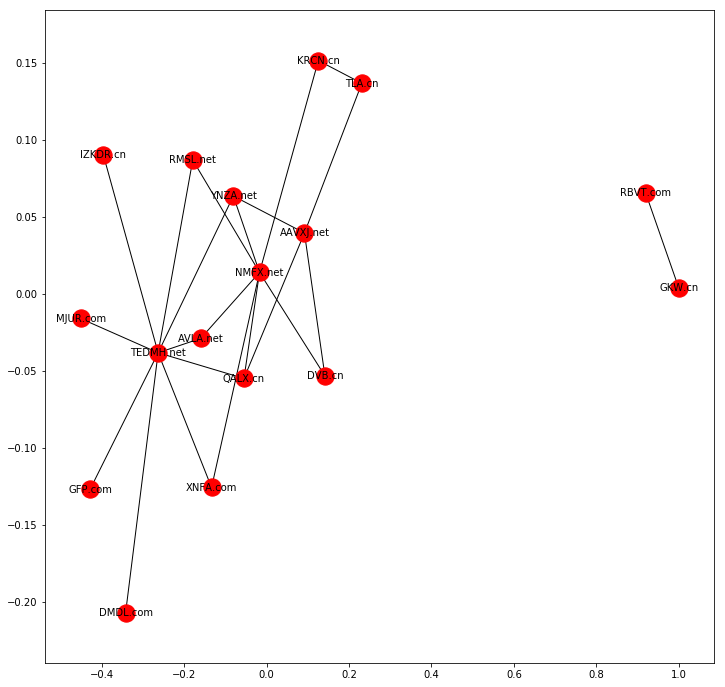

In [417]:
plt.figure(3,figsize=(12,12))
nx.draw_networkx(website_network, font_size=10)

In [421]:
sorted(nx.pagerank(website_network).items(),key=lambda x: x[1], reverse=True)

[('TEDMH.net', 0.19533064836461614),
 ('NMFX.net', 0.12522919177145894),
 ('AAVXJ.net', 0.08949561798285652),
 ('GKW.cn', 0.058823529411764705),
 ('RBVT.com', 0.058823529411764705),
 ('KRCN.cn', 0.05743604669207845),
 ('QALX.cn', 0.0558481491927516),
 ('YNZA.net', 0.0558481491927516),
 ('RMSL.net', 0.040633710994353055),
 ('XNFA.com', 0.040633710994353055),
 ('AVLA.net', 0.040633710994353055),
 ('TLA.cn', 0.040311436049389394),
 ('DVB.cn', 0.03924471515685212),
 ('GFP.com', 0.025426963447664187),
 ('IZKDR.cn', 0.025426963447664187),
 ('MJUR.com', 0.025426963447664187),
 ('DMDL.com', 0.025426963447664187)]